# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### TRAN-NGOC Linh - __[Linh.Tran-Ngoc@ulb.be](mailto:Linh.Tran-Ngoc@ulb.be) - Student ID 459764__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [26]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establush predictions for the DrivenData is also loaded.

In [27]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [3]:
options(repr.matrix.max.cols=100)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55656   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [28]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
length(categorical_variables)

[1] 30

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [29]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55656                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional\ needs\ repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

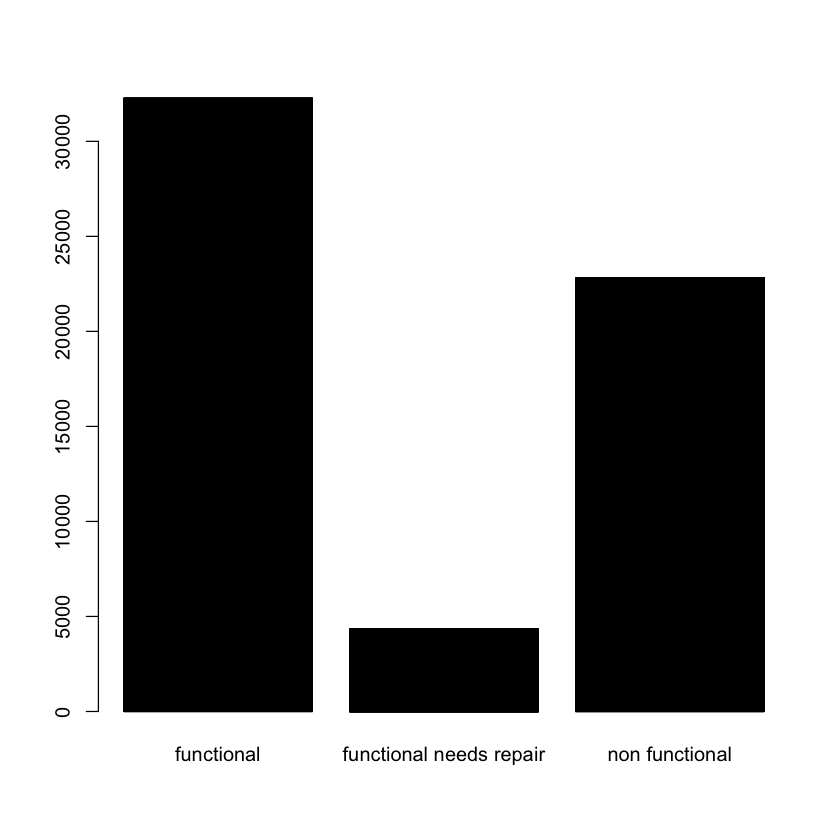

In [30]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


### Categorical variables

We check if there are any NA values in the dataset. The results show that no NA values are present in either dataset.

In [7]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings or $none$ strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [31]:
data <- merge(X,Y)
dim(data)
head(data)
demo_data <- data

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,⋯,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,⋯,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,⋯,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,⋯,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,⋯,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,⋯,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


We start by representing the number of missing values for each categorical variable (and the percentage it corresponds to in regard to the total number of samples). The missing values will be treated in several different ways :
- removing features containing too many missing values
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [32]:
empty_count <- c()
for (c in colnames(demo_data[,categorical_variables])) { 
    a <- dim(demo_data[demo_data[,c] == "none" | demo_data[,c] == "" | demo_data[,c] == "None",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(demo_data[,categorical_variables]),empty_count=empty_count,percentage=100*empty_count/nrow(demo_data))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3637,6.1228956
3,installer,3655,6.1531987
4,wpt_name,3565,6.0016835
6,subvillage,371,0.6245791
10,public_meeting,3334,5.6127946
12,scheme_management,3878,6.5286195
13,scheme_name,28835,48.5437710
14,permit,3056,5.1447811


It stands out that the feature $scheme\_name$ has more than 47% of missing values. We first analyze if any of the other classes of this feature could be interesting to keep (if there are there any dominant classes that affect a large number of samples that might bring some information). A barplot displays the 5 most common classes of this feature and shows the number of corresponding samples. We see that the other classes really represent extremely small amounts of samples (less than 1000), and that the missing values are too present to consider this feature as informative, it is therefore removed from the dataset.

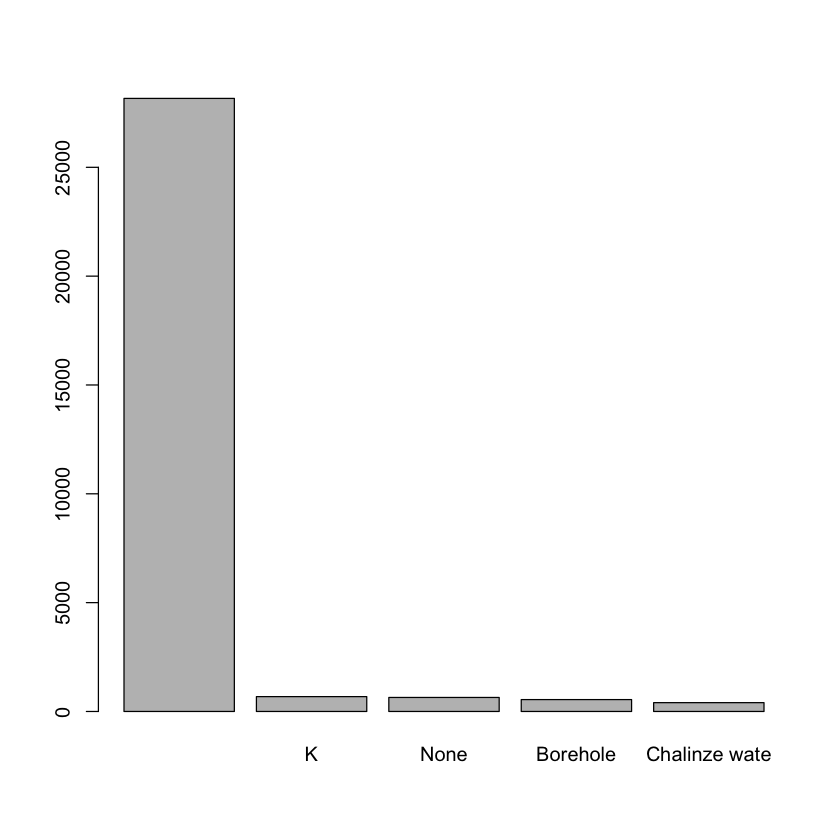

In [10]:
barplot((sort(table(demo_data$scheme_name), decreasing=TRUE)[1:5] ))

In [33]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

In [12]:
demo_data <- remove_scheme_name(demo_data)

The rest of the categorical features containing a lot of missing values will be treated throughout the preprocessing, using the various methods that were listed previously.

### Numerical variables

In [13]:
numerical_variables <- which(sapply(X[1,],class)=="integer" | sapply(X[1,],class)=="numeric")
length(numerical_variables)
colnames(data)[numerical_variables]

[1] 10

[1] "id"                "amount_tsh"        "gps_height"       
 [4] "longitude"         "latitude"          "num_private"      
 [7] "region_code"       "district_code"     "population"       
[10] "construction_year"

Concerning the numerical variables, it is sometimes tricky to know whether 0s correspond to missing values or not. For the $longitude$ and $latitude$ features, we can plot the data graphically :

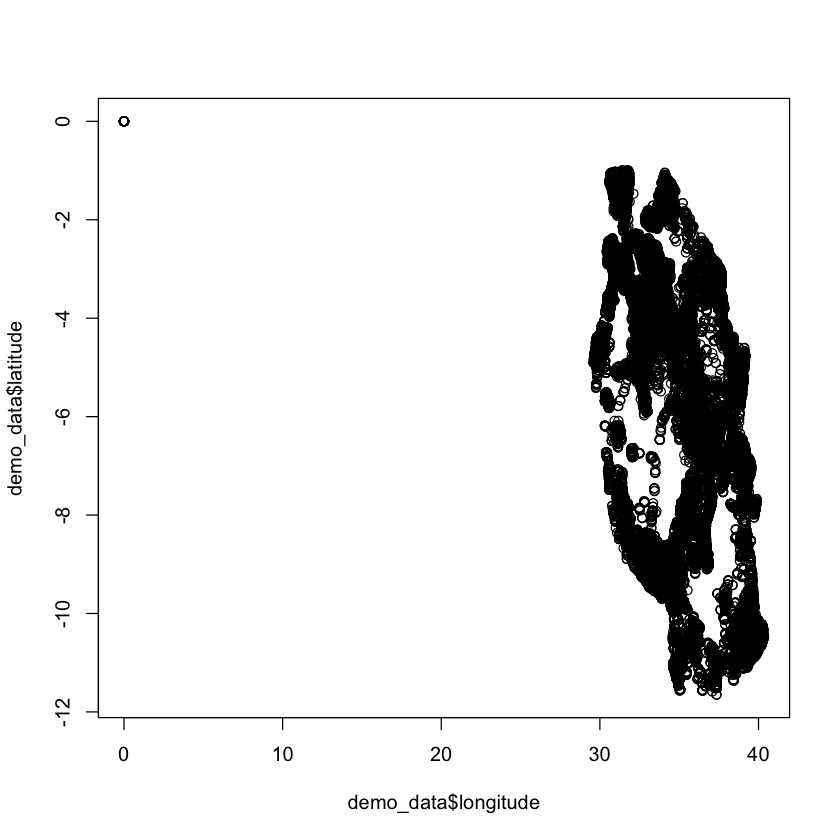

In [14]:
plot(demo_data$longitude,demo_data$latitude)

We see some outliers that have coordinates (0,0), which we will replace by the mean values of the coordinates.

In [34]:
discard_unrealistic_coordinates <- function(df) {
    df$longitude[df$longitude < 20] <- mean(df$longitude)
    df$latitude[df$longitude < 20] <- mean(df$latitude)
    return(df)
}

In [16]:
demo_data <- discard_unrealistic_coordinates(demo_data)

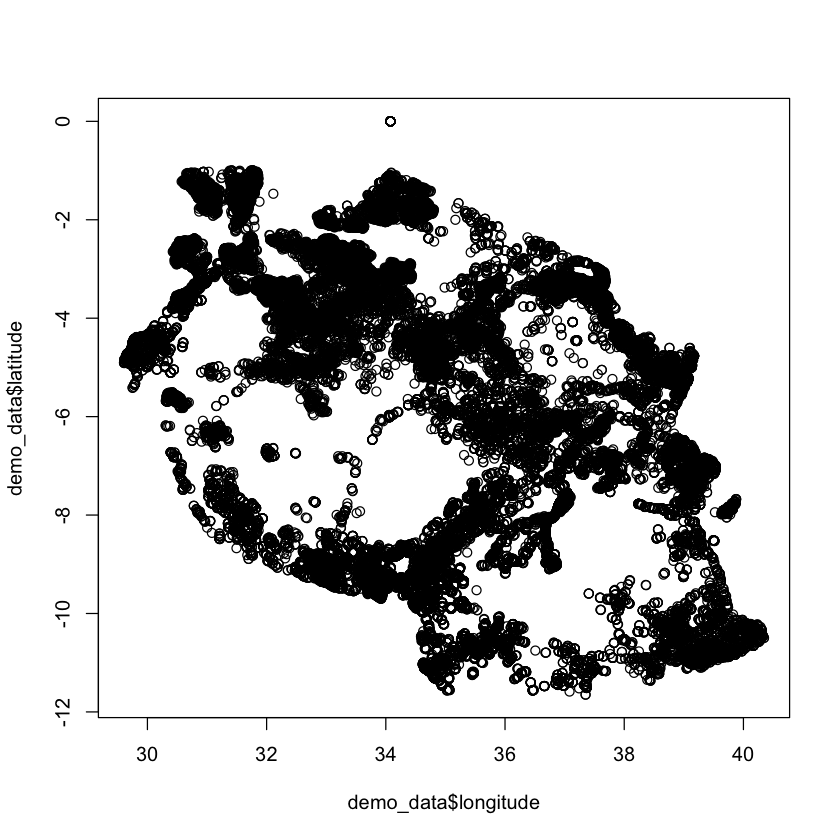

In [17]:
plot(demo_data$longitude,demo_data$latitude)

Concerning the $construction\_year$ feature, it is equal to 0 for 35\% of the samples. In this particular case, replacing the values by the mean value of the feature does not seem logical, and deleting 35\% of the dataset because of this particular feature is not an option either. Therefore, we chose to divide the construction years into groups of 10 years, use it as a categorical variable with one-hot encoding and discard the one-hot encoded feature corresponding to the 0-year.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0    1986    1301    2004    2013 

[1] 20709

[1] 34.86364

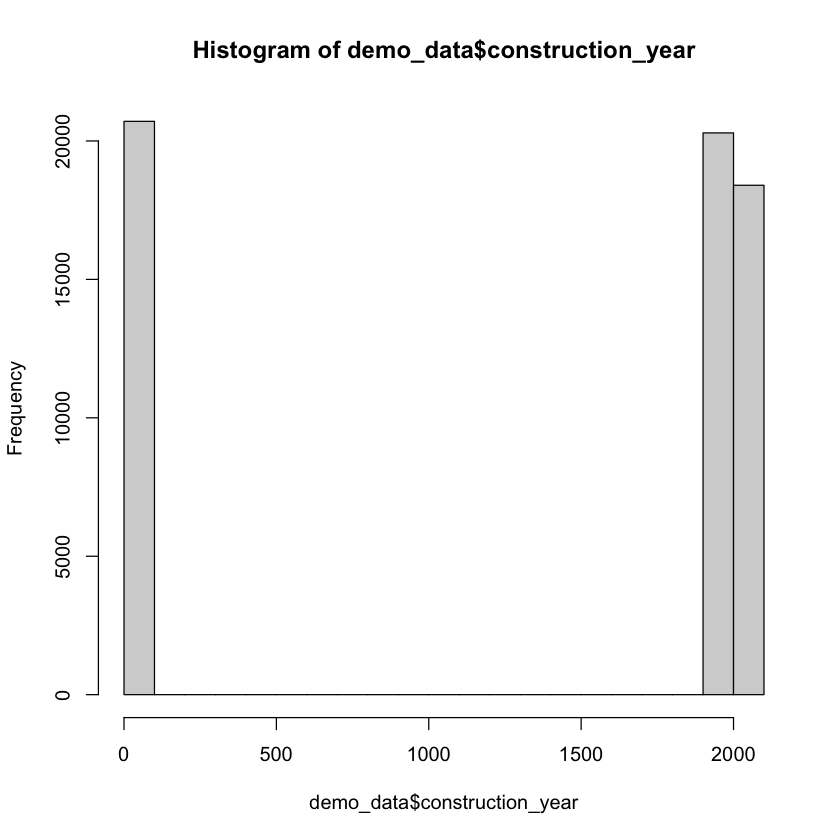

In [18]:
summary(demo_data$construction_year)
dim(demo_data[demo_data$construction_year == 0,])[1]
100*dim(demo_data[demo_data$construction_year == 0,])[1]/nrow(demo_data)
hist(demo_data$construction_year)

In [19]:
nlevels(as.factor(demo_data$construction_year))

[1] 55

In [36]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [35]:
one_hot_construction_year <- function(df) {
    df$construction_year[df$construction_year > 1959 & df$construction_year < 1970] = "1960s"
    df$construction_year[df$construction_year > 1969 & df$construction_year < 1980] = "1970s"
    df$construction_year[df$construction_year > 1979 & df$construction_year < 1990] = "1980s"
    df$construction_year[df$construction_year > 1989 & df$construction_year < 2000] = "1990s"
    df$construction_year[df$construction_year > 1999 & df$construction_year < 2010] = "2000s"
    df$construction_year[df$construction_year > 2009 & df$construction_year < 2020] = "2010s"
    df$construction_year <- as.factor(df$construction_year)
    dum <- dummy.data.frame(df,names=c("construction_year"), sep="_")
    df <- subset(dum,select=-c(construction_year_0))

    return(df)
}

In [23]:
demo_data <- one_hot_construction_year(demo_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [25]:
summary(demo_data)

       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55656   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [37]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [38]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [39]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [29]:
demo_data <- remove_useless_features(demo_data)

In [30]:
dim(demo_data)

[1] 59400    44

## Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features ($public\_meeting$ and $permit$), which take the values True, False or an empty string. There is also a feature $source\_class$ that contains only 2 classes and an $unknown$ class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

[1] "public_meeting"
[1] 
Levels:  False True
[1] "permit"
[1] True
Levels:  False True


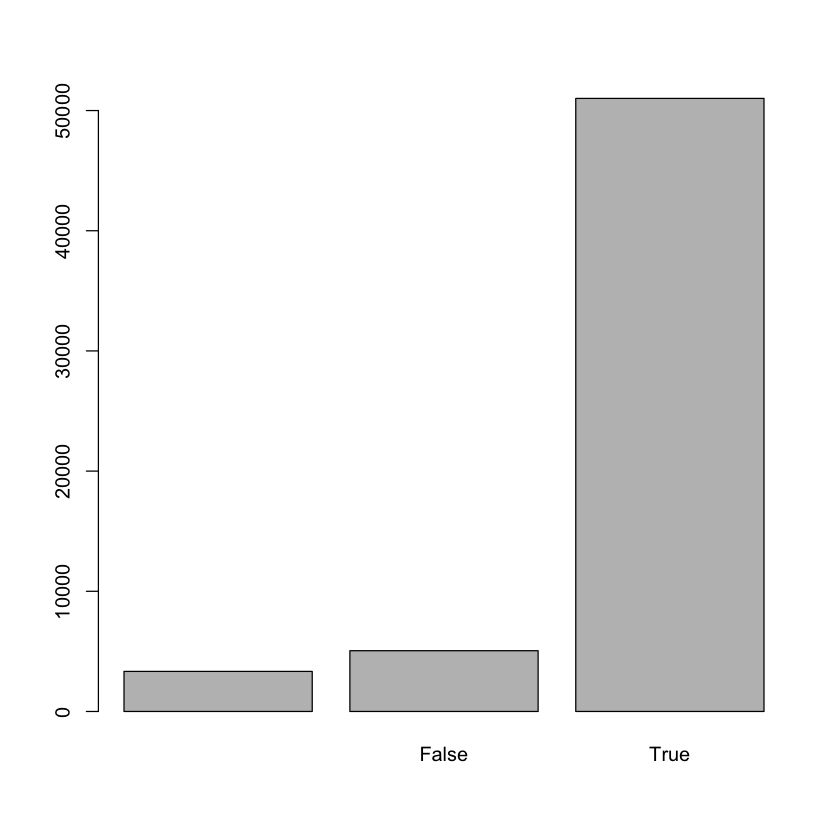

[1] "source_class"
[1] groundwater
Levels: groundwater surface unknown


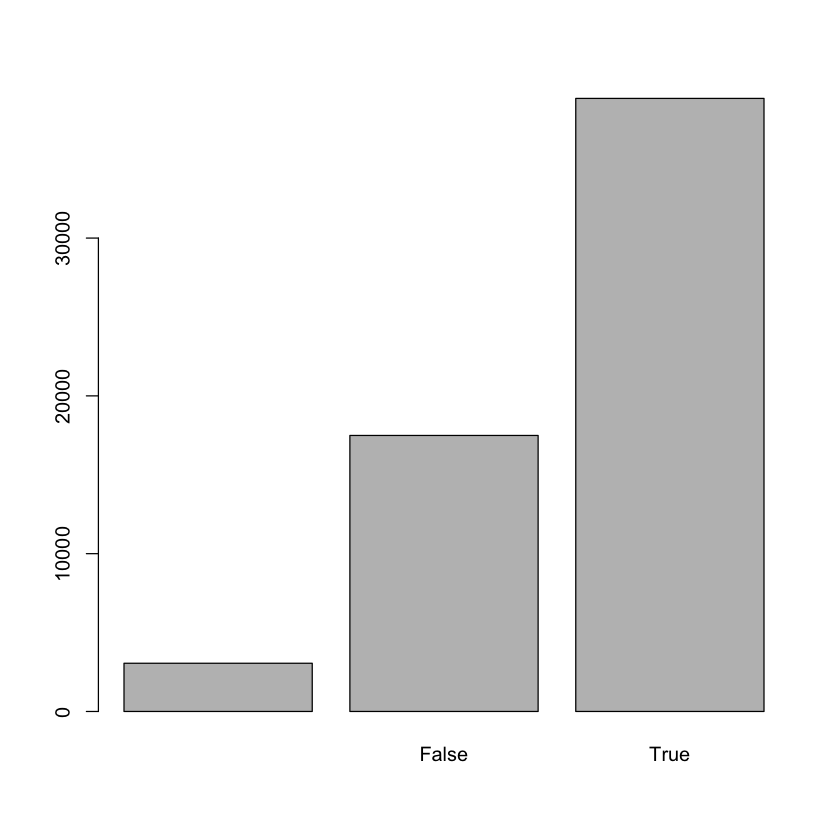

[1] "status_group"
[1] non functional
Levels: functional functional needs repair non functional


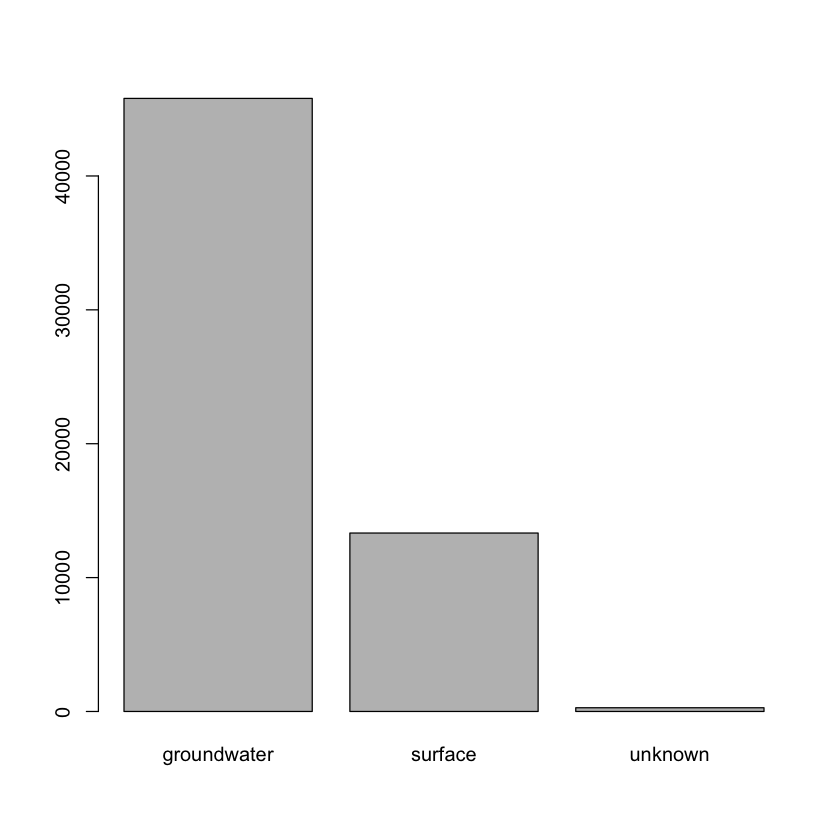

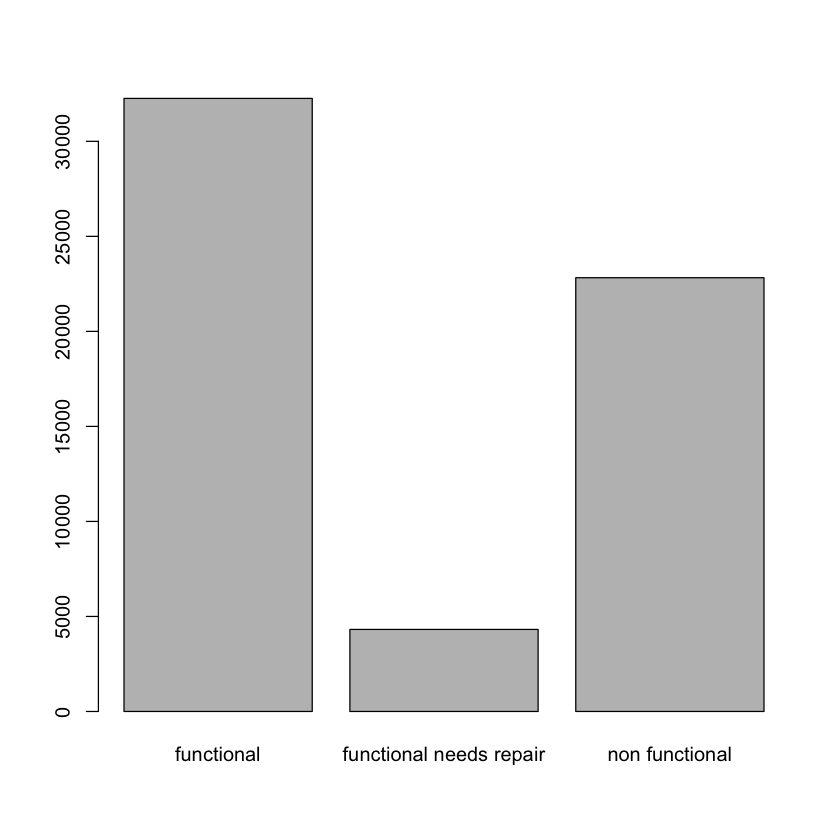

In [40]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        print(n)
        print(data[1,n])
        barplot(table(data[,n]))
    }
}

In [42]:
create_binary_features_training <- function(df) {
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [43]:
create_binary_features_test <- function(df) {
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [32]:
demo_data <- create_binary_features_training(demo_data)

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one. To avoid having unnecessarily large values, the minimal date is substracted.

In [44]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    df$date_recorded <- df$date_recorded - min(df$date_recorded)
    return(df)
}

In [35]:
demo_data <- convert_date_to_numeric(demo_data)

In [36]:
min(demo_data$date_recorded)

[1] 0

In [37]:
head(demo_data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,3683,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,VWC,True,0,0,0,0,0,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,3064,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,,False,0,0,0,0,1,0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,3086,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,VWC,True,0,0,0,0,0,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,3885,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,Water Board,True,0,0,0,1,0,0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,3081,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,VWC,True,0,0,0,0,0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,3057,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,Private operator,False,0,0,0,0,0,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features.

In [37]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)


                  afridev                      cemo                    climax 
                     1770                        90                        32 
                  gravity             india mark ii            india mark iii 
                    26780                      2400                        98 
                      ksb                      mono               nira/tanira 
                     1415                      2865                      8154 
                    other other - mkulima/shinyanga         other - play pump 
                     6430                         2                        85 
        other - rope pump            other - swn 81               submersible 
                      451                       229                      4764 
                   swn 80                    walimi                  windmill 
                     3670                        48                       117 


        afridev         gravity   india mark ii  india mark iii            mono 
           1770           26780            2400              98            2865 
    nira/tanira           other  other handpump other motorpump       rope pump 
           8154            6430             364             122             451 
    submersible          swn 80    wind-powered 
           6179            3670             117 


     gravity     handpump    motorpump        other    rope pump  submersible 
       26780        16456         2987         6430          451         6179 
wind-powered 
         117 

In [11]:
table(data$management)
table(data$scheme_management)


         company            other   other - school       parastatal 
             685              844               99             1768 
private operator            trust          unknown              vwc 
            1971               78              561            40507 
 water authority      water board              wua              wug 
             904             2933             2535             6515 


                          Company             None            Other 
            3877             1061                1              766 
      Parastatal Private operator              SWC            Trust 
            1680             1063               97               72 
             VWC              WUA              WUG      Water Board 
           36793             2883             5206             2748 
 Water authority 
            3153 

In [19]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

In [20]:
table(data$source)
table(data$source_type)


                 dam             hand dtw                 lake 
                 656                  874                  765 
         machine dbh                other rainwater harvesting 
               11075                  212                 2295 
               river         shallow well               spring 
                9612                16824                17021 
             unknown 
                  66 


            borehole                  dam                other 
               11949                  656                  278 
rainwater harvesting           river/lake         shallow well 
                2295                10377                16824 
              spring 
               17021 

In [21]:
table(data$quantity)
table(data$quantity_group)


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

In [22]:
table(data$water_quality)
table(data$quality_group)


          coloured           fluoride fluoride abandoned              milky 
               490                200                 17                804 
             salty    salty abandoned               soft            unknown 
              4856                339              50818               1876 


 colored fluoride     good    milky    salty  unknown 
     490      217    50818      804     5195     1876 

In [25]:
table(data$payment)
table(data$payment_type)


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

In [45]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [46]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000) {
        print(n)
        problematic_features <- c(problematic_features,n)
        print(data[1,n])
    }
}
problematic_features

[1] "funder"
[1] Tasaf
1898 Levels:  0 A/co Germany Aar Abas Ka Abasia ... Zingibali Secondary
[1] "installer"
[1] TASAF
2146 Levels:  - 0 A.D.B AAR ABASIA ABD ABDALA ABDUL AC ACORD ACRA ... world vision
[1] "wpt_name"
[1] Mratibu
37400 Levels: 24 A Kulwa A Saidi Abass Abbas Abdala Hamisi ... none
[1] "subvillage"
[1] Majengo
19288 Levels:  ## 'A' Kati 1 14Kambalage 18 19 20 22B 23B 24 24B 30 42 43 ... Zuri
[1] "ward"
[1] Igalula
2092 Levels: Aghondi Akheri Arash Arri Arusha Chini Babayu Badi Badugu ... Zuzu
[1] "scheme_name"
[1] 
2697 Levels:  14 Kambarage A ADP ADP Simbo ADP Simbu ADRA AIC ... water supply in katungulu


[1] "funder"      "installer"   "wpt_name"    "subvillage"  "ward"       
[6] "scheme_name"

For each one of these features, we check the distribution of the different categories.

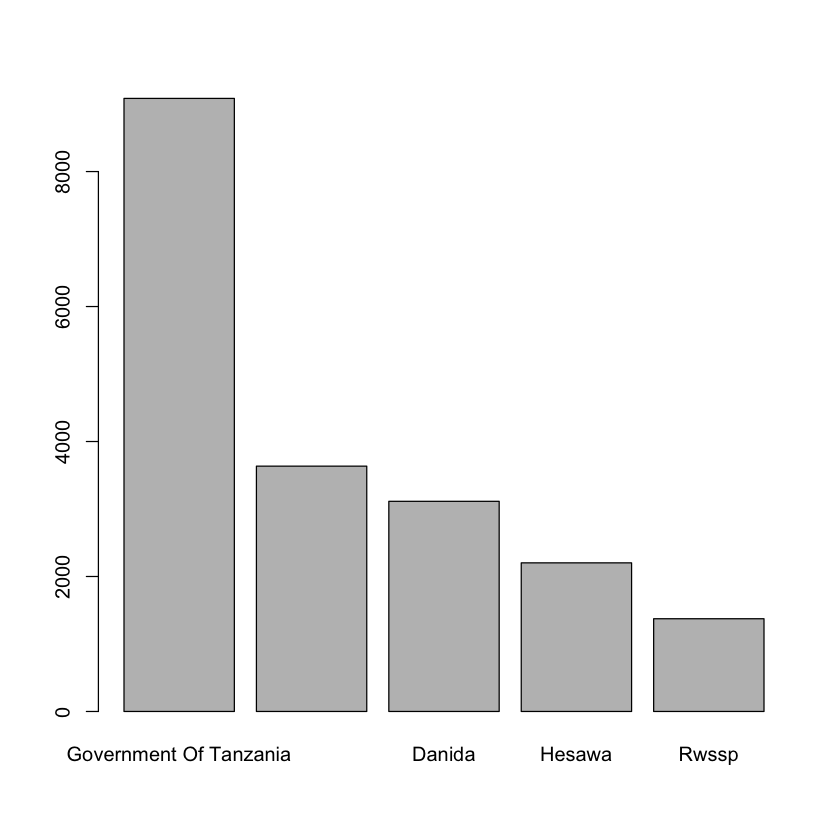

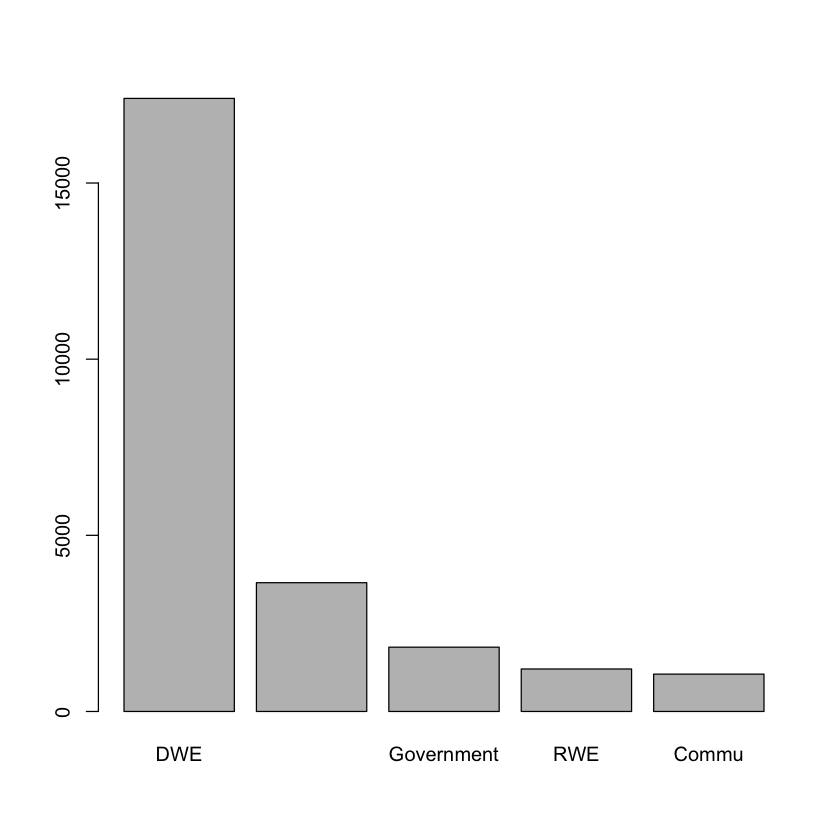

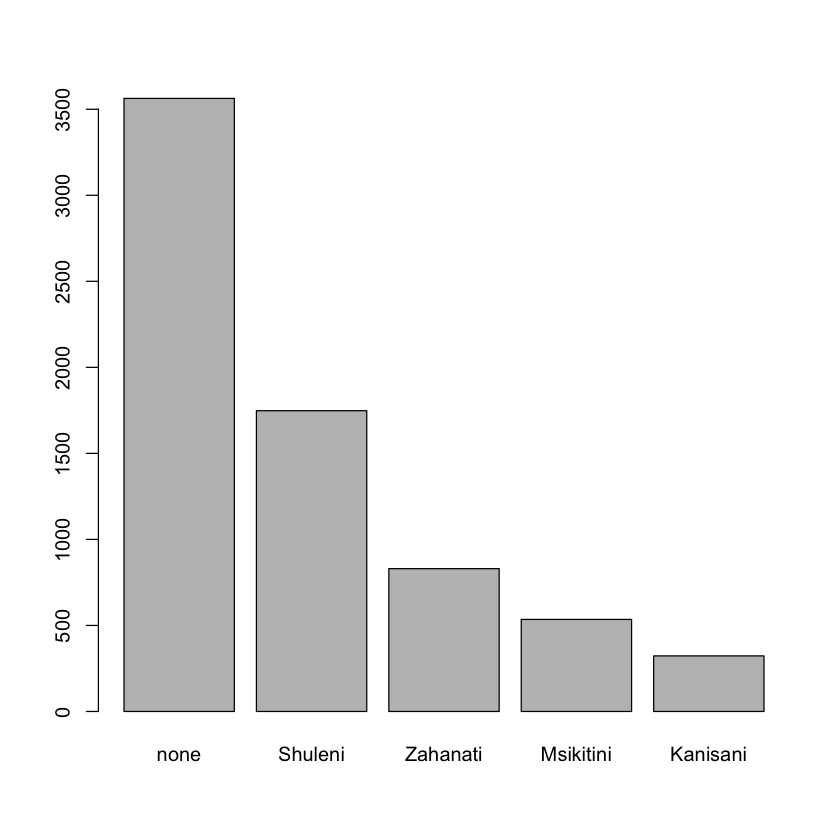

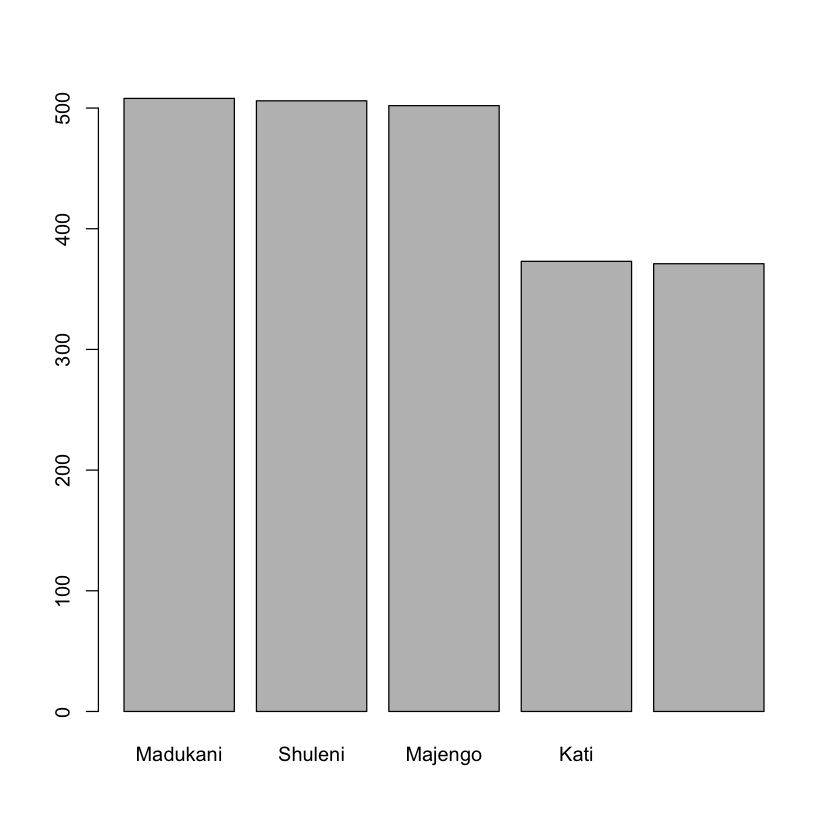

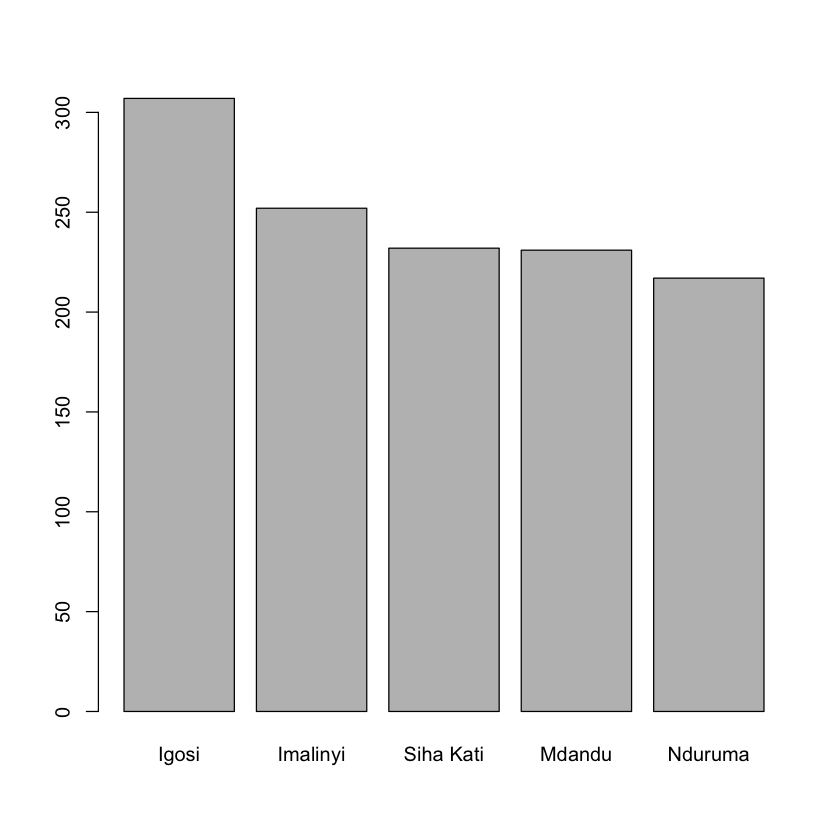

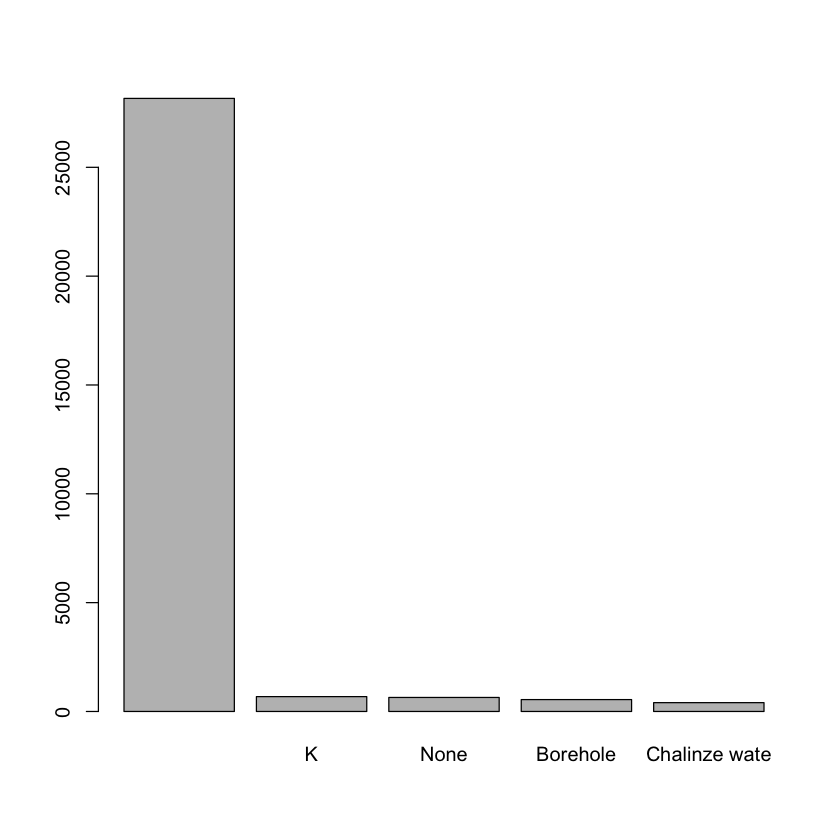

In [40]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the $installer$ feature contains more than 16000 samples with the category $DWE$ so it might be useful to simply keep track of whether the installer is DWE or not (binary value). The same goes for $funder$, where there are a lot of samples corresponding to the class $Government\ Of\ Tanzania$.

In [47]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

In [48]:
convert_funder_to_binary <- function(df) {
    levels(df$funder) <- c(levels(df$funder), "1","0") 
    df$funder[df$funder == "Government Of Tanzania"] <- 1
    df$funder[df$funder != "1"] <- 0
    df <- transform(df, funder = as.integer(as.character(funder)))
    return(df)
}

In [44]:
demo_data <- convert_installer_to_binary(demo_data)

In [45]:
demo_data <- convert_funder_to_binary(demo_data)

By analyzing the rest of the barplots, either there are extremely few samples of each category of the feature, or there are majoritarily samples containing $none$ or an empty string. Therefore, we choose to remove them from the dataset.

In [49]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-c(wpt_name,subvillage,ward))
    return(df)
}

In [50]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [48]:
demo_data <- remove_features_many_levels(demo_data)

## One-hot encoding

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [ ]:
install.packages('dummies')

In [51]:
library(dummies)

In [52]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [53]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

## Handle the numerical features

### Preprocess the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region. Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [54]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [55]:
generate_regions <- function(df) {
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}

In [56]:
get_optimal_clustering_params <- function() {
    best_correlation <- 0
    best_seed <- 1
    correlations <- numeric(length(5:40))
    dum <- dummy.data.frame(demo_data[,ncol(demo_data),drop=F],names=c("status_group"), sep="_")
    coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))

    for(k in 5:40) {
        for(s in 1:30) {
            set.seed(s)
            km_res <- kmeans(coordinates,k)
            region_kmeans <- km_res$cluster

            correlation <- 0
            for(i in 1:ncol(dum)) {
                correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
            }
            correlations[k] <- correlations[k] + correlation
            if(correlation > best_correlation) {
                best_k <- k
                best_correlation <- correlation
                best_seed <- s
            }
        }
    }
}

In [57]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [58]:
set_existing_regions <- function(df) {
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [58]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5,49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9,36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [59]:
set.seed(19)
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,8)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

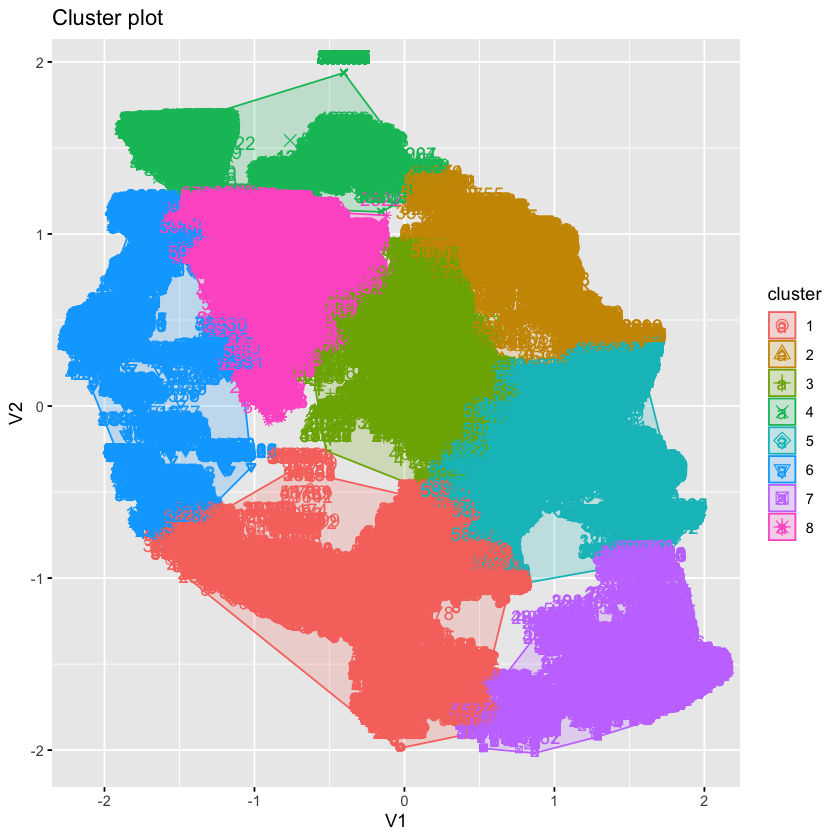

In [60]:
fviz_cluster(km_res,coordinates)

### Remove useless numerical features

The feature $id$ is different for each sample, and does not bring any information. It is therefore removed.

In [61]:
nlevels(as.factor(demo_data$id))

[1] 59400

In [59]:
remove_id <- function(df) {
    return(subset(df,select=-c(id)))
}

In [63]:
demo_data <- remove_id(demo_data)

## Dataset balancing

In order to avoid the previously described situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### SMOTE

In [17]:
install.packages("performanceEstimation")

Installing package into 'C:/Users/minhx/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'performanceEstimation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minhx\AppData\Local\Temp\Rtmpop2NsV\downloaded_packages


In [60]:
library(performanceEstimation)

In [61]:
create_smote_dataset <- function(df) {
    print(head(df))
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [66]:
demo_data <- create_smote_dataset(demo_data)

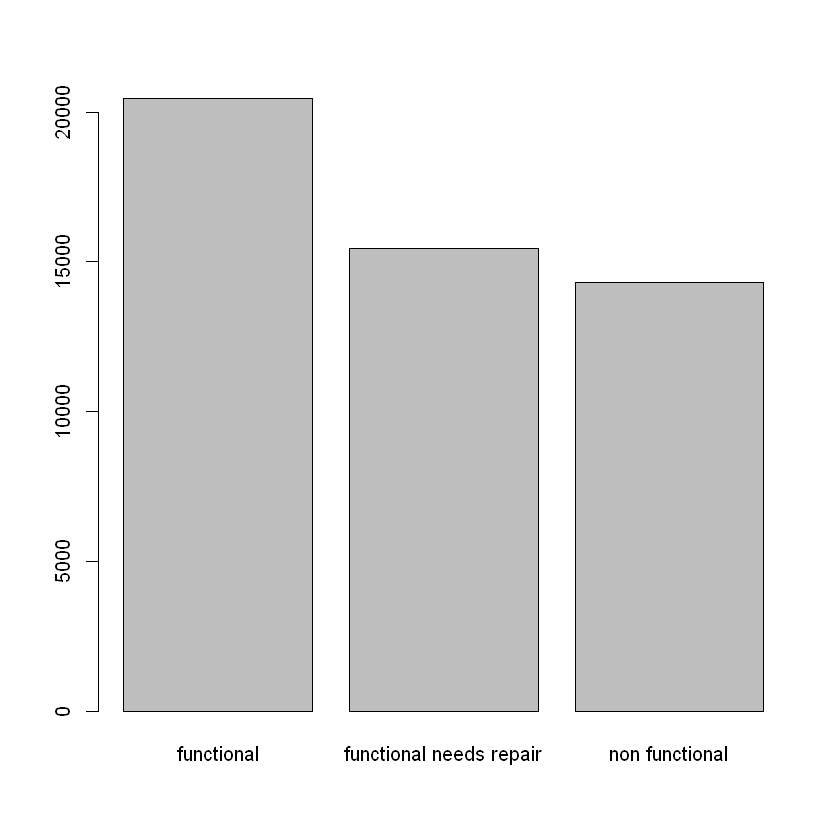

In [67]:
barplot(table(demo_data$status_group))

In [108]:
dim(demo_data)

[1] 50206    39

### Over sampling

In [62]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[df$status_group == "functional needs repair",]
    for(i in 1:1) {
        df <- rbind(df,to_dup)
    }
    #to_remove <- which(data$status_group == "functional")[1:10000]
    #print(to_remove)
    return(df)
}

In [68]:
demo_data <- data

In [111]:
dem <- create_over_sampling_dataset(demo_data)

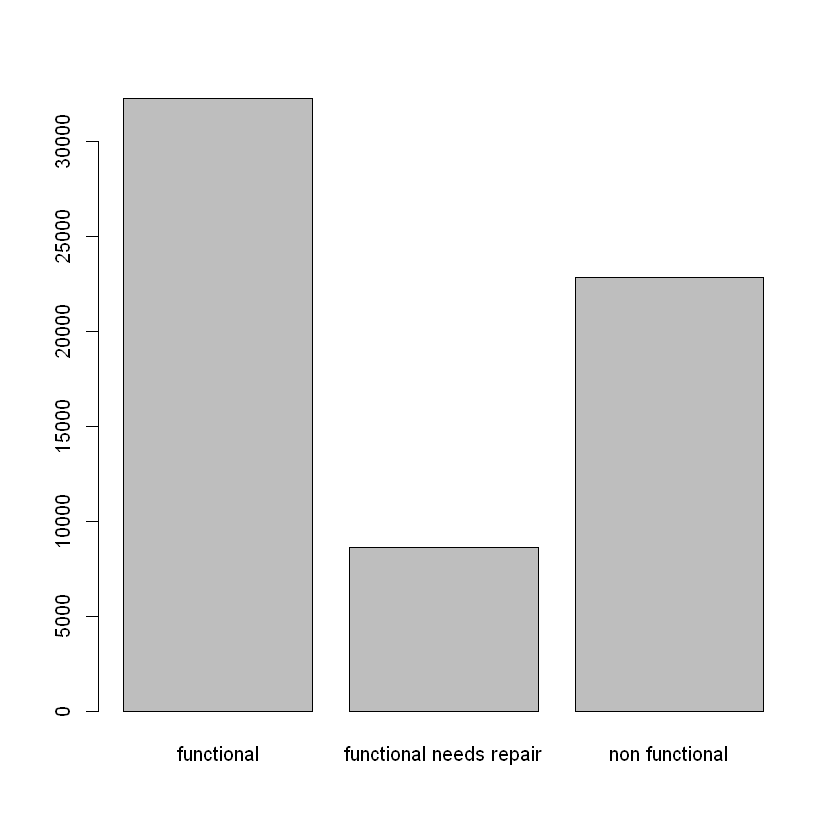

In [112]:
barplot(table(dem$status_group))

# Feature selection

## mRMR on one-hot encoded data

In [63]:
apply_mrmr_numerical <- function(df,k=NULL) {
    #print(head(df[,ncol(df)]))
    X <- subset(df,select=-c(status_group))
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    #print(head(dum[,1]))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    #print(correlation)
    n <- ncol(X)
    if(is.null(k)) {
        k <- n
    }
    selected_features <- c()
    candidate_features <- 1:n
    #message(correlation)
    for(j in 1:k) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        message(best_candidate)
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [64]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)],k=100)    
    df <- df[,sorted_features[1:k]]
    return(df)
}

## mRMR on categorical data

In [65]:
apply_mrmr <- function(X,Y) {
    selected_features <- c()
    n <- ncol(X)
    candidate_features <- 1:n
    correlation <- c()
    for (i in 1:n) {
        chi_value <- chisq.test(X[,i], Y)
        correlation[i] <- chi_value$statistic
    }
    message(correlation)
    correlation <- correlation/max(correlation)
    redundancy_score <- c()
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if(length(selected_features) > 0) {
            for (c in 1:length(candidate_features)) {
                redundancy_cor <- numeric(length(selected_features))
                for (s in 1:length(selected_features)) {
                    #print(length(X[,selected_features[s]]))
                    #print(length(X[,candidate_features[c]]))
                    chi_value <- chisq.test(X[,selected_features[s]],X[,candidate_features[c]])
                    redundancy_cor[s]  <- chi_value$statistic
                    message(chi_value$statistic)
                }
                message(redundancy_cor)
                redundancy_score[c] <- mean(redundancy_cor)
            }
        }
        #message(redundancy_score)
        mRMR_score <- correlation[candidate_features] - redundancy_score
        #message(mRMR_score)
        #message(candidate_features)
        max_score_candidate <- candidate_features[which.max(mRMR_score)]
        message(max_score_candidate)
        selected_features <- c(selected_features,max_score_candidate)
        candidate_features <- setdiff(candidate_features,max_score_candidate)
    }
    #write(selected_features,"selected_features.txt")
    #print(selected_features)
}

## PCA

Another method has been used to compare the results. PCA is a technique that can be used to perform dimensionality reduction. We selected a reduced number of princial components based on the scree plot showing the percent variation for every principal components. We have performed the PCA on the entire training set and then projected it on the test set.

In [66]:
pca <- function(df,nb_components){
    X <- df[,setdiff(colnames(df),"status_group")]
    # Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
    X_pca <- prcomp(X, scale=TRUE) 
    return(X_pca)
}

pca_select <- function (df,X_pca,nb_components){
    #project the PCA to the a specific dataset
    X_pca <- predict(X_pca,newdata=df)[,1:nb_components]
    return(X_pca)
}


Before applying the PCA, here is what the data look like

In [74]:
library(dummies)
load(file="demo_data_pca_.Rdata")
head(demo_data_pca)

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,region_code,district_code,population,public_meeting,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,source_class,region_kmeans,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,⋯,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand_dtw,source_lake,source_machine_dbh,source_rainwater_harvesting,source_river,source_shallow_well,source_spring,waterpoint_type_cattle_trough,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_dam,waterpoint_type_hand_pump,waterpoint_type_improved_spring,waterpoint_type_other,status_group
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,0,3064,0,1978,0,0,11,4,20,1,0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
3,0,3086,0,0,0,0,1,4,0,1,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,⋯,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,functional
4,10,3885,0,1639,0,0,3,5,25,1,1,0,0,0,1,0,0,1,6,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,functional
5,0,3081,0,0,0,0,1,4,0,1,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,⋯,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,non functional
6,50,3057,0,28,0,0,60,43,6922,1,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,functional
7,0,3659,1,0,0,0,17,3,0,1,1,0,0,0,0,0,0,1,7,1,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,non functional


After applying the PCA, the data become less interpretable.
We decided to only keep the 50 first principal components, those are the one which have the most percent variation.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,⋯,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,-0.2028042,-2.1974208,3.9518757,-1.6859544,2.457083,-1.4141969,0.5711891,1.5727665,3.2926193,-4.75000934,3.5968513,2.163086012,-0.5853612,0.04897984,-2.814504835,0.9032781,-0.04455189,2.5082348,-5.01676996,1.4983223,0.47301304,-1.3317348,-12.9204857,3.25494156,0.8252447,⋯,2.0454912,1.7106039,2.6172296,-0.8303245,1.219476821,3.2474298,-1.0620894,1.5706124,2.5907923,-1.87988790,-1.1634630,-0.4914930,-0.008861324,2.1382430,0.26647570,-0.83629592,0.4213554,1.2508053,0.0514273,-0.09027627,0.65949165,0.8916970,-1.19595687,-1.0935068,functional
3,-1.3537650,4.4054815,0.2300856,-4.8235831,-3.165782,-1.7349835,-3.4878624,-2.9633238,-2.0829777,-0.31991229,-0.8464173,3.104219807,0.3048387,2.25262204,3.081024499,-1.1346994,1.18712359,-1.7118191,-0.78525987,0.6729712,0.27952542,0.2281007,-1.6118741,-0.22996769,-0.6441772,⋯,-0.3210819,-1.0159101,0.2750175,0.5424619,0.001853737,-1.1142065,-0.6918596,-1.3346455,0.2828068,0.03243957,2.6216184,1.0767136,2.053847281,-1.0633363,0.18688419,-0.05555621,-0.7560481,1.1920414,0.3415271,-0.83378954,0.05806281,0.3369703,-0.19579433,0.7992335,functional
4,4.4398795,-0.2121255,-2.7745963,0.8893792,-1.383983,-2.8960125,1.8660315,1.5784315,-0.5958401,0.93990094,0.4052684,1.184905994,1.2501271,-0.02268669,1.528314745,-0.3329383,-2.38753355,1.8022800,0.82657411,-1.9974722,-0.49092275,2.6839612,-0.1390582,-0.32429148,-3.2418081,⋯,0.7522440,-1.2485919,0.4406207,1.2222238,0.021328396,0.5569788,1.9404540,0.3660352,-0.5615061,-0.42279304,-0.5193689,0.3209998,2.255003775,0.7602623,-2.33078488,-0.91828458,-0.2159424,0.3915159,-1.4213396,-1.70518497,-0.42791176,-0.6644118,-1.05923876,0.4736107,functional
5,-3.1700548,-0.2461996,0.1711284,-2.9722792,-1.397580,-0.7221501,-1.2876159,-1.4199005,-1.1699410,0.04191665,-1.5950860,2.267460428,0.4140308,1.50857862,1.488398481,-0.4447455,2.55114844,-0.5512442,0.07725917,0.5369505,-0.16553022,0.2562668,-1.1555597,-0.09015625,-0.6032681,⋯,-0.9477055,-2.7247265,0.7165389,0.5782403,0.424166488,-1.6484566,-1.5779575,0.1031783,1.9706042,2.01400982,3.4032430,0.4990994,1.833083858,-0.2761085,-0.71602115,2.04290792,1.0014150,2.1570062,-0.9116731,-1.19356493,0.56899532,-0.1870176,-0.04852707,0.6818474,non functional
6,-1.8693144,9.1786915,0.2557252,-1.9148169,3.267183,0.1097038,3.0506294,2.1481789,1.2782051,1.78407384,2.3204718,-0.007486551,-2.7229477,-0.66976412,-1.804365071,-2.4068860,1.72041404,-0.1990046,1.45851314,-2.5494886,-0.30890613,0.6745532,0.7872147,2.57677197,0.5395346,⋯,-2.3373011,-0.9397362,-0.5678756,-1.3639322,-3.175646665,1.2096059,0.5638549,-1.6464228,2.3095635,1.43443070,-1.2617552,-0.4837968,1.217726170,-0.5080283,0.83876850,-0.29788235,0.1391823,-1.6506320,-0.2493662,-0.17329738,-2.62833942,0.9895242,1.03775974,-0.3394755,functional
7,-3.0228751,-0.9319009,-2.6435347,1.1646468,-1.434580,2.5479344,-1.4015204,-0.3910873,1.0120195,-2.57189153,-1.9091583,0.707205673,-1.3266027,0.25609308,-0.003425709,1.0424070,-2.62854135,0.2981262,1.81781251,-0.7702058,0.08076695,-1.2314871,-0.7950736,0.22188152,-0.4942766,⋯,-0.2358292,-0.2407586,-0.8897535,-0.8532126,-0.591762184,-0.4813359,0.5161517,-0.7880775,1.9169319,-0.61226535,0.8639823,-0.9471704,-0.171002950,0.3198300,-0.01987446,0.42375454,-1.2004815,-1.3688719,0.8416289,0.79256609,0.95828025,1.4083763,0.99491458,0.6748302,non functional


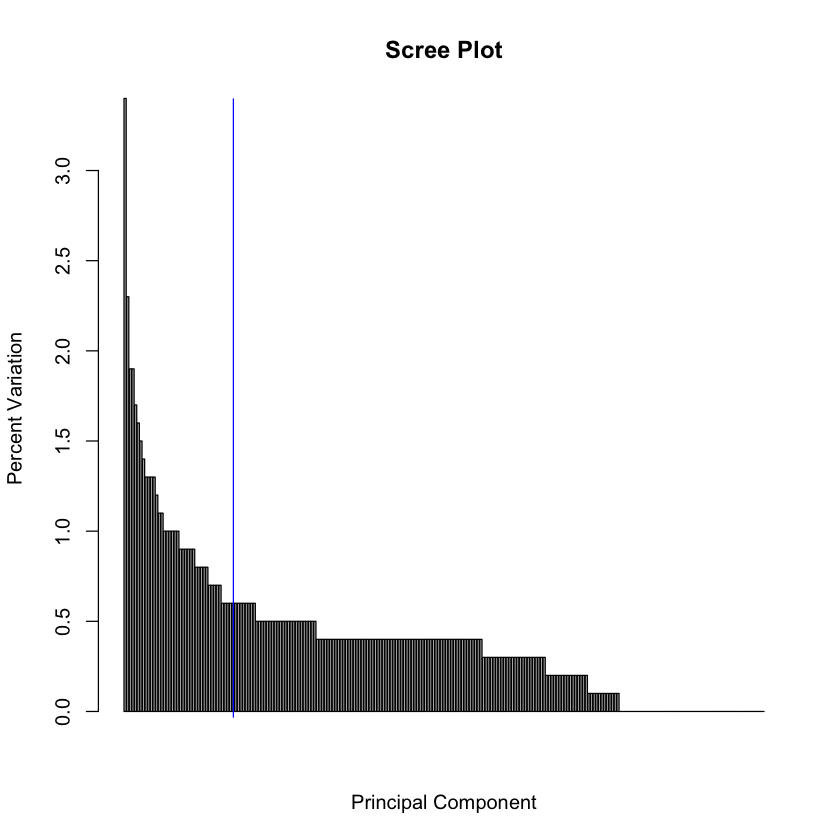

In [75]:
X_pca <- pca(demo_data_pca)
nb_components <- 50

## make a scree plot
X_pca.var <- X_pca$sdev^2
X_pca.var.per <- round(X_pca.var/sum(X_pca.var)*100, 1)
barplot(X_pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")
abline(v = nb_components,col="blue")

X_pca <- pca_select(demo_data_pca,X_pca,nb_components)

demo_data_pca <- cbind(X_pca,subset(demo_data_pca,select=c(status_group)))
head(demo_data_pca)
  

# Call the preprocessing functions

In [67]:
preprocess_basic_training <- function(df){
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_training(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    return (df)
}

In [68]:
preprocess_training_mrmr <- function(df) {
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    df_ordered <- get_k_mrmr_variables(df,100)
    df_ordered <- df_ordered[,order(names(df_ordered))]
    print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    #df <- create_over_sampling_dataset(df)
    #df <- create_smote_dataset(df)
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [69]:
preprocess_training_pca <- function(df) {
    df <- preprocess_basic_training(df)
    df <- df[,order(colnames(df))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")   
    X_pca <- pca(df)
    save(X_pca, file = "X_pca.Rdata")
    df_pca <- df[,setdiff(colnames(df),"status_group")]
    print(dim(df_pca))
    df_no_status <- pca_select(df_pca,X_pca,50)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    # df <- create_smote_dataset(df) peut etre que faire le pca puis le smote marchera mtn vu qu'il est à la fin mtn
    return(df)
}

In [70]:
preprocess_test <- function(df,pca) {
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_test(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
      
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    if(pca){
        load(file = "X_pca.Rdata")
        print(dim(df))
        df_no_status <- pca_select(df,X_pca,50)
        df <- df_no_status[,order(colnames(df_no_status))]
    }
    return(df)
}


In [83]:
data_preproc_mrmr <- preprocess_training_mrmr(data)
data_preproc_pca <- preprocess_training_pca(data)
#save(data_preproc, file = "data_preproc_pca.Rdata")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

  amount_tsh date_recorded funder gps_height installer num_private region_code
2          0          3064      0       1978         0           0          11
3          0          3086      0          0         0           0           1
4         10          3885      0       1639         0           0           3
5          0          3081      0          0         0           0           1
6         50          3057      0         28         0           0          60
7          0          3659      1          0         0           0          17
  district_code population public_meeting permit construction_year_1960s
2             4         20              1      0                       0
3             4          0              1      1                       0
4             5         25              1      1                       0
5             4          0              1      1                       0
6            43       6922              1      0                       0
7        

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
224

225

226

227

178

173

186

243

238

239

241

188

185

232

32

211

214

210

177

223

222

54

199

16

17

13

220

201

209

203

3

80

187

4

235

234

236

7

231

215

48

139

182

21

14

176

24

22

29

27

65

26

34

18

52

233

10

228

153

196

46

39

143

76

172

104

28

36

41

192

202

19

23

242

133

95

25

44

103

212

8

62

20

38

1

229

77

106

5

108

73

190

31

51

100

11

168

94

144

63



  amount_tsh basin_Internal basin_Lake_Nyasa basin_Lake_Rukwa
2          0              0                0                0
3          0              0                0                0
4         10              0                0                0
5          0              0                0                0
6         50              0                0                0
7          0              1                0                0
  basin_Lake_Tanganyika basin_Lake_Victoria basin_Pangani basin_Rufiji
2                     0                   0             0            1
3                     0                   0             0            0
4                     0                   0             1            0
5                     0                   0             0            0
6                     0                   0             0            0
7                     0                   0             0            0
  basin_Ruvuma_/_Southern_Coast basin_Wami_/_Ruvu construction_year_1

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1] 53042   243


In [82]:
# save(data_preproc, file = "data_preproc.Rdata")
head(data_preproc)
dim(data_preproc)
barplot(table(data_preproc$status_group))

ERROR: Error in head(data_preproc): objet 'data_preproc' introuvable


## Feature engineering

## Feature selection

# Model selection

## Model 1


In this section, we present 3 differents neural based models. The Neural Network (NNET), the Radial Basis Function (rbf) and a multi layer perceptron (mlp). A hyperparameter of those models are the number of hidden neurons that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [87]:
install.packages("RSNNS")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpleDwHn/downloaded_packages


In [88]:
library("nnet")
library("randomForest")
library("RSNNS")


Loading required package: Rcpp



Function that will be use to compute the accuracy of our models

In [1]:
accuracyFromConfusionMatrix <- function(confusion_matrix){   
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}

computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

Cross validation of our different models, the cross validation has been used for the tunning and to validate our results.

In [92]:
#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     # Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    # For each unique group:
    for (i in 1:k){
        # Take the group as a hold out or test data set, the remaining groups as a training data set.
        # Format of training and data set adapted to the model use
        if (model_type=="nnet"){
            train_data <- data[-splits[[i]],]
            test_data <- data[splits[[i]],]
            Y <- test_data[,target_variable]
            print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
        }
        if (model_type=="rbf" || model_type=="mlp"){
            train_data <- scaled[-splits[[i]],]
            train_label <- data[-splits[[i]],target_variable]
            test_data <- scaled[splits[[i]],]
            test_label <- data[splits[[i]],target_variable]
            n_train <- dim(train_data)[1]
            Y <- test_label
        } 
        
        #Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
            model <- nnet(status_group ~ ., data=train_data,size=parameter,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=10000,trace=FALSE)
        }

        if (model_type=="rbf"){
            model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                           size=parameter, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
        }
        if(model_type=="mlp"){
            model <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)  
        }
        
        # Prediction on test set

        Y_pred <- predict(model,test_data)
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
       
        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"))
        }

    #Resuls of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    # Results of in and out of sample
    accuracy <- inOutSampleTest(data,scaled,target_variable,data_idx,half_split,parameter)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

In and out of sample verification.

In [93]:
inOutSampleTest <- function(data,scaled,target_variable,data_idx,half_split,parameter){
    # Split training-test for in/out of sample predictions
    if (model_type=="nnet"){
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
    } 
    if (model_type=="rbf" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        n_train <- dim(train_data)[1]
    } 
    train_label <- data[data_idx[1:half_split],target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    Y <- test_label
    # model for in and out of sample
    if(model_type=="nnet"){
        model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=10000)
    } 
    if (model_type=="rbf"){
        model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                       size=parameter, 
                       maxit=75, 
                       #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       #initFunc="RBF_Weights_Kohonen",
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    } 
    if(model_type=="mlp"){
        model_single_out <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
    } 
    
    #Prediction 
    
    # In sample evaluation 
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
    Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
     # Out of sample evaluation 
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
    Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    

    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}


In [94]:
applyCVInOutComp <- function(parameters,k,model_type){
    accuray_in_sample_vec <- numeric()
    accuray_out_sample_vec <- numeric()
    accuray_cv_vec <- numeric()

    for(parameter in parameters){
        print(paste("[INFO] - Testing h=",parameter))
        results <- crossValidationInOutSample(parameter,k,model_type)
        accuray_in_sample_vec <- c(accuray_in_sample_vec,results$in_sample)
        accuray_out_sample_vec <- c(accuray_out_sample_vec,results$out_sample)
        accuray_cv_vec <- c(accuray_cv_vec,results$cv)
    }
    return (list(in_sample=accuray_in_sample_vec,out_sample=accuray_out_sample_vec,cv=accuray_cv_vec))
}
    

To perform the cross validation with another model change the model_type to either "mlp", "nnet", "rbf"

In [96]:
model_type <- "mlp"
k <- 3
parameters <- list(2,10,40)
load(file = "data_preproc.Rdata")
accury_vec <- applyCVInOutComp(parameters,k,model_type)

[1] "[INFO] - Testing h= 2"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 1 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional           6855                     842           2526
  non functional        337                      88           2613
[1] "[INFO] - Accuracy 1 fold : 0.713973305180605"
[1] "[INFO] - Misclassification rate 1 fold : 0.286026694819395"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 2 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional           6980                     887           2464
  non functional        340                      85           2505
[1] "[INFO] - Accuracy 2 fold : 0.71525525978433"
[1] "[INFO] - Misclassification rate 2 fold : 0.28474474021567"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 3 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional           6799                     866           2620
  non functional        319                     115           2542
[1] "[INFO] - Accuracy 3 fold : 0.704396350199834"
[1] "[INFO] - Misclassification rate 3 fold : 0.295603649800166"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 4 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional           6842                     842           2180
  non functional        449                     137           2809
[1] "[INFO] - Accuracy 4 fold : 0.727882947431933"
[1] "[INFO] - Misclassification rate 4 fold : 0.272117052568067"
[1] "[INFO] - CV - Accuracy: 0.715376965649176"
[1] "[INFO] - CV - Mean misclassification rate: 0.284623034350824"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix In sample :"
                Y
Y_hat            functional functional needs repair non functional
  functional          13879                    1700           4815
  non functional        632                     202           5293
[1] "[INFO] - Accuracy In sample : 0.722898834885562"
[1] "[INFO] - Misclassification rate In sample : 0.277101165114438"
[1] "[INFO] - Confusion matrix Out sample :"
                Y
Y_hat            functional functional needs repair non functional
  functional          13767                    1758           5023
  non functional        643                     202           5128
[1] "[INFO] - Accuracy Out sample : 0.712454281512763"
[1] "[INFO] - Misclassification rate Out sample : 0.287545718487237"
[1] "[INFO] - Testing h= 10"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 1 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6647                     643           1657
  functional needs repair         45                     118             21
  non functional                 653                     200           3277
[1] "[INFO] - Accuracy 1 fold : 0.757258125329915"
[1] "[INFO] - Misclassification rate 1 fold : 0.242741874670085"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 2 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    5915                     569           1302
  functional needs repair         59                     104             36
  non functional                1186                     314           3776
[1] "[INFO] - Accuracy 2 fold : 0.738632079028731"
[1] "[INFO] - Misclassification rate 2 fold : 0.261367920971269"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 3 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    5712                     473           1174
  functional needs repair        116                     150             55
  non functional                1370                     333           3878
[1] "[INFO] - Accuracy 3 fold : 0.734484578840208"
[1] "[INFO] - Misclassification rate 3 fold : 0.265515421159792"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 4 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6587                     673           1683
  functional needs repair         38                      82             25
  non functional                 593                     203           3375
[1] "[INFO] - Accuracy 4 fold : 0.757523191794253"
[1] "[INFO] - Misclassification rate 4 fold : 0.242476808205747"
[1] "[INFO] - CV - Accuracy: 0.746974493748277"
[1] "[INFO] - CV - Mean misclassification rate: 0.253025506251723"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix In sample :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12818                    1178           2540
  functional needs repair         70                     238             48
  non functional                1617                     531           7481
[1] "[INFO] - Accuracy In sample : 0.77436748237246"
[1] "[INFO] - Misclassification rate In sample : 0.22563251762754"
[1] "[INFO] - Confusion matrix Out sample :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12445                    1201           2928
  functional needs repair         90                     194             60
  non functional                1881                     520           7202
[1] "[INFO] - Accuracy Out sample : 0.74812412804947"
[1] "[INFO] - Misclassification rate Out sample : 0.25187587195053"
[1] "[I

Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 1 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6336                     574           1190
  functional needs repair         84                     166             26
  non functional                 847                     267           3771
[1] "[INFO] - Accuracy 1 fold : 0.77467762612171"
[1] "[INFO] - Misclassification rate 1 fold : 0.22532237387829"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 2 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6029                     531           1113
  functional needs repair         63                     149             18
  non functional                1100                     280           3978
[1] "[INFO] - Accuracy 2 fold : 0.765854762084307"
[1] "[INFO] - Misclassification rate 2 fold : 0.234145237915693"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 3 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6280                     503           1241
  functional needs repair        127                     221             58
  non functional                 827                     202           3802
[1] "[INFO] - Accuracy 3 fold : 0.776939898951814"
[1] "[INFO] - Misclassification rate 3 fold : 0.223060101048186"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix 4 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6539                     649           1477
  functional needs repair         48                     142             32
  non functional                 641                     178           3553
[1] "[INFO] - Accuracy 4 fold : 0.771853080926163"
[1] "[INFO] - Misclassification rate 4 fold : 0.228146919073837"
[1] "[INFO] - CV - Accuracy: 0.772331342020999"
[1] "[INFO] - CV - Mean misclassification rate: 0.227668657979001"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix In sample :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12698                     884           1521
  functional needs repair        276                     621             75
  non functional                1485                     461           8500
[1] "[INFO] - Accuracy In sample : 0.822706534444403"
[1] "[INFO] - Misclassification rate In sample : 0.177293465555597"
[1] "[INFO] - Confusion matrix Out sample :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   11937                     954           2193
  functional needs repair        298                     450            103
  non functional                2227                     492           7867
[1] "[INFO] - Accuracy Out sample : 0.763696693186531"
[1] "[INFO] - Misclassification rate Out sample : 0.236303306813469"


Graph of the cross validation made just above.

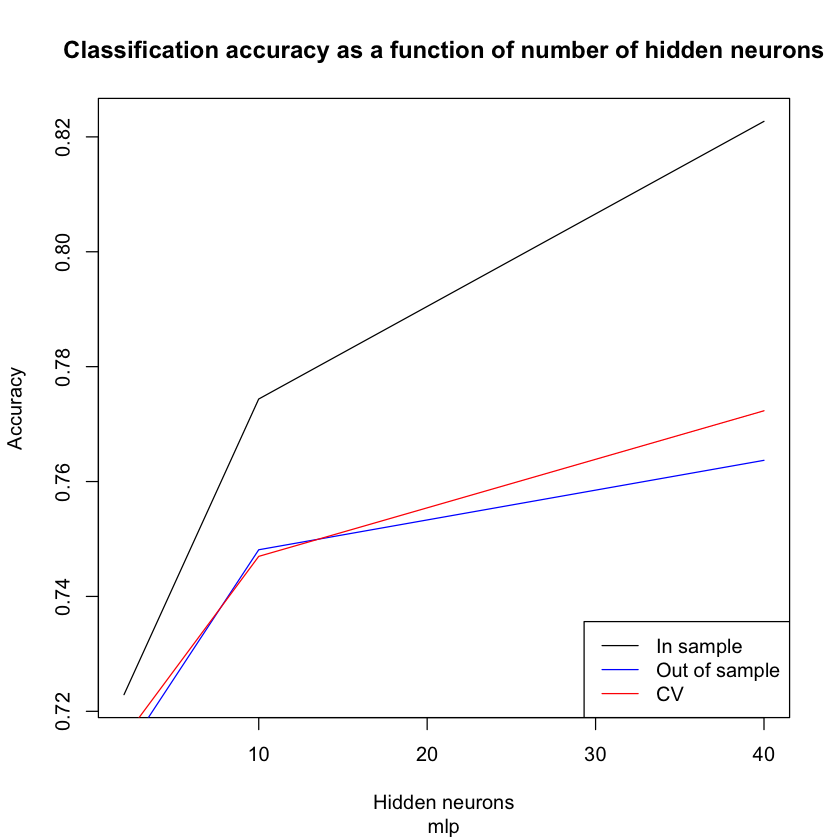

In [97]:
plot(parameters,accury_vec$in_sample,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy",sub=model_type)
lines(parameters,accury_vec$in_sample)
lines(parameters,accury_vec$out_sample,col="blue")
lines(parameters,accury_vec$cv,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

In [98]:
plot_CV_mrmr <- function(param,model_feature,zoom){
    plot(parameters,error_in_sample_vec,type="n",main=paste("Classification accuracy as a function of number of", param, sep = " "),xlab=param,ylab="Accuracy",sub=model_feature,ylim=zoom)
    lines(parameters,error_in_sample_vec)
    lines(parameters,error_out_sample_vec,col="blue")
    lines(parameters,error_cv_vec,col="red")
}
plot_CV_pca <- function (){
    lines(parameters,error_in_sample_vec,lty=2)
    lines(parameters,error_out_sample_vec,col="blue",lty=2)
    lines(parameters,error_cv_vec,col="red",lty=2)
    legend("bottomright",legend=c("In sample (mrmr)","Out of sample(mrmr)","CV(mrmr)","In sample (pca)","Out of sample(pca)","CV(pca)"),col=c("black","blue","red","black","blue","red"),lty=c(1,1,1,2,2,2))
}


Experiments have been made upstream to save time. Here are the graphs we used to tune our models. 


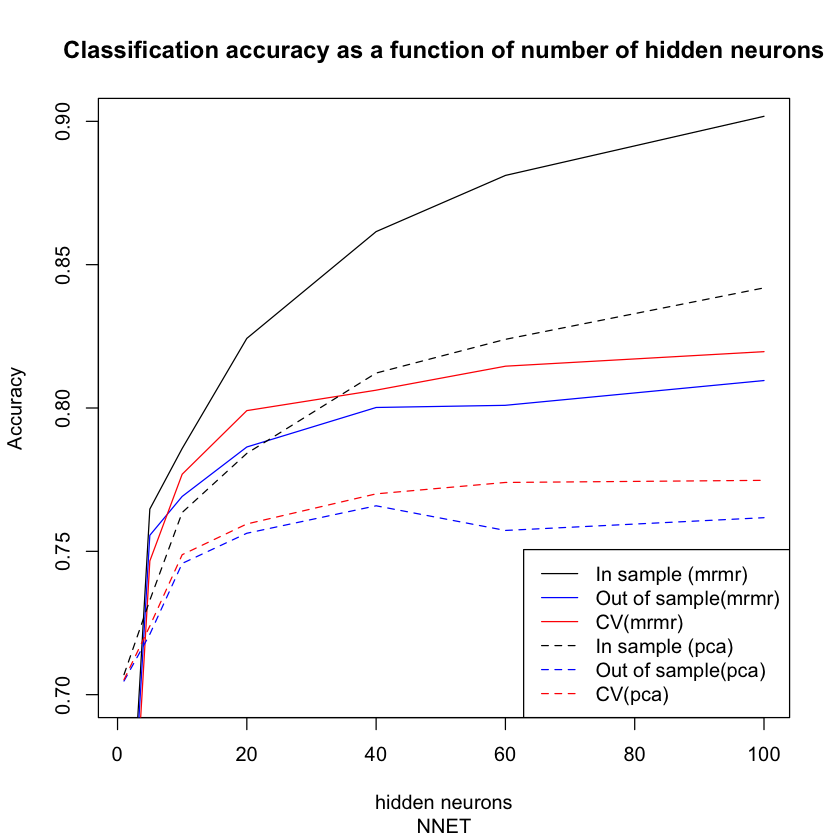

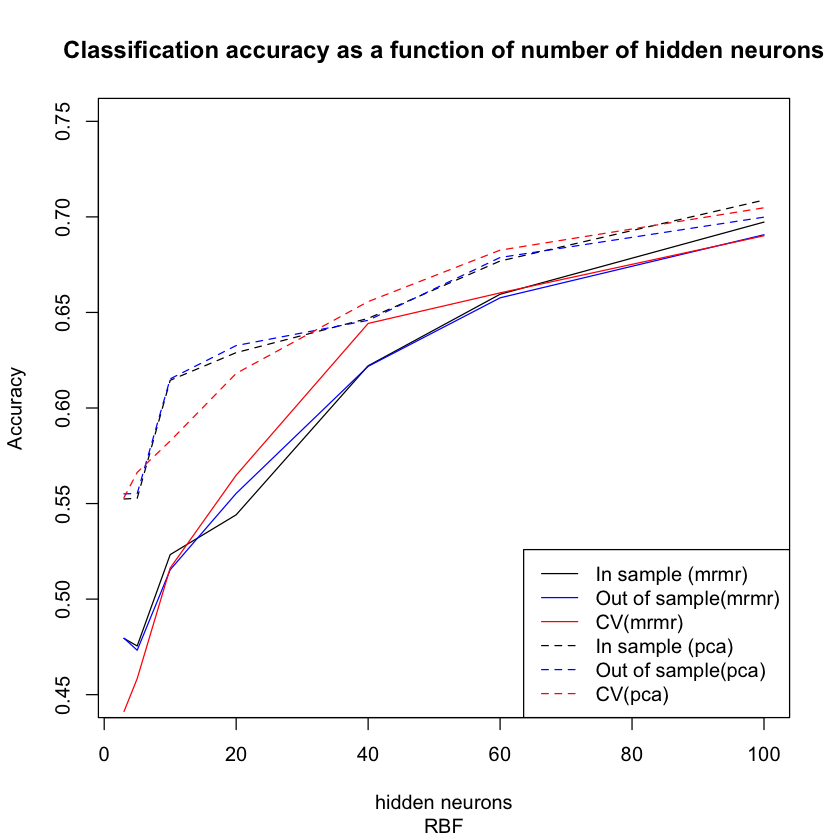

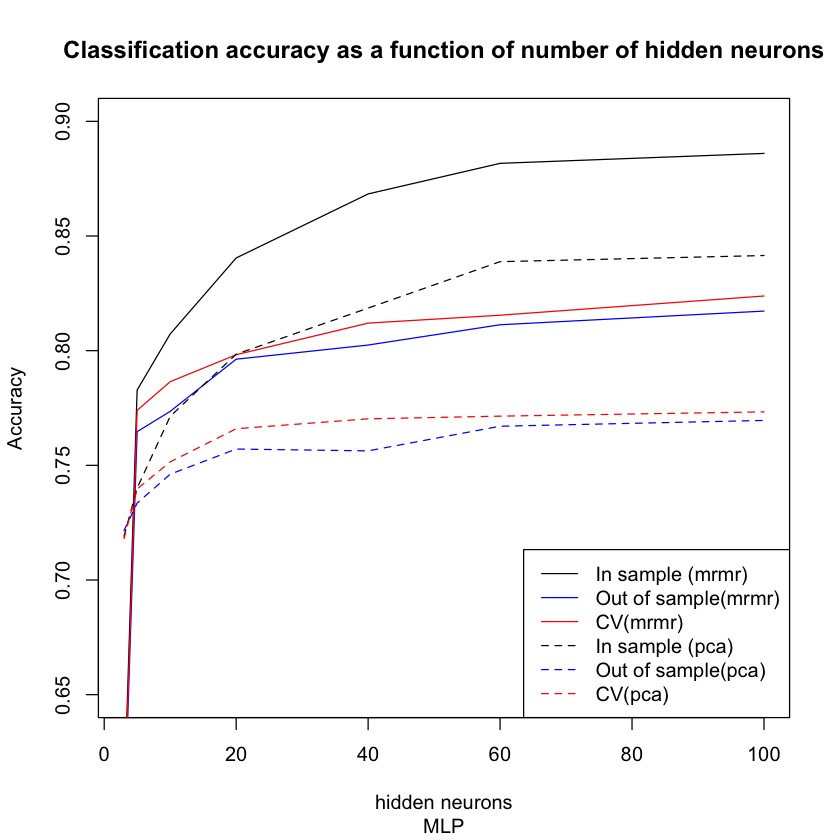

In [99]:
parameters <- list(1,5,10,20,40,60,100)

load("CV_nn_mrmr.Rdata")
plot_CV_mrmr ("hidden neurons","NNET",c(0.7,0.9))
load("CV_nn_pca.Rdata")
plot_CV_pca()

load("CV_rbf_mrmr.Rdata")
parameters <- list(3,5,10,20,40,60,100)
plot_CV_mrmr ("hidden neurons","RBF",c(0.45,0.75))
load("CV_rbf_pca.Rdata")
plot_CV_pca()

load("CV_mlp_mrmr.Rdata")
plot_CV_mrmr ("hidden neurons","MLP",c(0.65,0.90))
load("CV_mlp_pca.Rdata")
plot_CV_pca()



A stagnation of the performance can be observe when increasing the values of the parameters. The cross validation results are the ones we used as the validation metric as it provides more realistic accuracy than the two others methods of evaluation.
Note that the in sample results are not good indicators of accuracy as it is usually too optimistic due to the overfitting.
Here are the best parameter value for each model:
NNET : 100 hidden neurons with MRMR (81.96% of accuracy)
RBF : 100 hidden neurons with PCA (70.47% of accuracy)
MLP : 100 hidden neurons with MRMR (82.38% of accuracy)

We did not try larger number of hidden neurons as the gain in performance is very small compared to the computation time required. The gain in accuracy start to slow down after 60 hidden neurons for the NNET and 40 hidden neurons for the MLP.
Remark : the multi layer perceptron (MLP) allows us to use multi layers, however no gain in performance has been observe when using this option. Therefore, we only kept 1 layer to gain in computation time.

Function that handle the bag version of every model. The choice of the final prediction is made trough a majority vote.

In [ ]:
Bagging <- function(n_bagging_resamples,model_type,parameters){
   
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # Normalize dataset
        data<-data.frame(scaled ,data[,"status_group"])
        names(data)[length(names(data))]<-"status_group" 
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
        n_train <- nrow(train_data)
        Y_hat_bagged<-array(0,c(length(test_data),1))
        Y <- test_data[,target_variable]
    }
     if (model_type=="rbf" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- nrow(train_data)
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
    }
   
    Y_pred_models<-numeric()
    accuracy_vec<-array(0,c(1,n_bagging_resamples))

    for (i in 1:n_bagging_resamples)
    {
      # Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # Fit model
      if (model_type == "nnet"){
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=parameters, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
           Y_pred <- predict(model,test_data[,-target_variable])
      }
      if (model_type=="rbf"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=parameters, 
                           maxit=75, 
                           initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

      }
      if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = parameters, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
      }

      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
        
      #store model
      if(i==1){
           models_bagged<-list(model)
    
      }else{
           models_bagged <- c(models_bagged,list(model))

      }
     
    }
     #Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
    
     #single model
     if (model_type == "nnet"){
             model_single_out <- nnet(status_group ~ ., data=train_data,size=parameters,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "rbf"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=3,
                           size=parameters, 
                           maxit=150, 
                           initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = parameters, maxit = 10)
      }
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
                           
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec,bag_models = models_bagged, single_model = model_single_out ))
}

All the test and running have been made upstream, the results can be found here under.


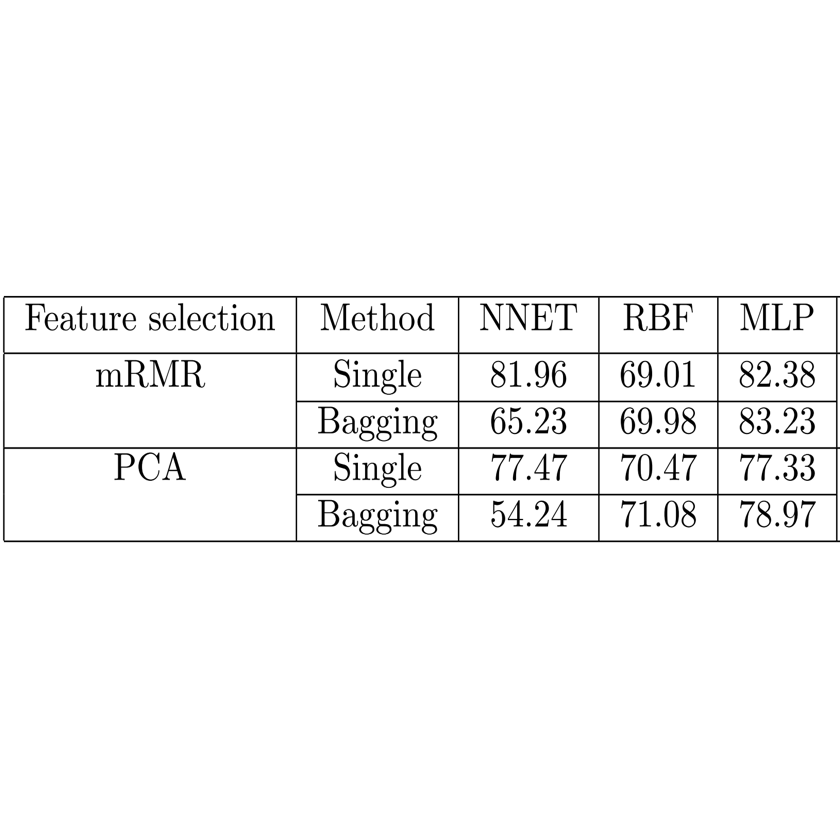

In [107]:
library("png")
img <- readPNG("neural_tab.PNG")
grid::grid.raster(img,width=1.0,height=0.3,interp=TRUE)

Because of the running time, we limited the bagging to 1 model with a limited number of hidden nodes (8) and a limited number of bagging resamples (4). 
To perform the bagging with another model change the model_type to either "mlp", "nnet", "rbf".

In [109]:
load(file = "data_preproc.Rdata")
results <- Bagging(n_bagging_resamples=4,"mlp",parameters=c(8))

Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must matc

[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   13455                    1435           3595
  functional needs repair         71                     171             24
  non functional                1001                     306           6463
[1] "[INFO] - Accuracy bagged model : 0.757475208325478"
[1] "[INFO] - Misclassification rate bagged model : 0.242524791674522"
[1] 0.7574752


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
“SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)”


[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12315                    1281           2951
  functional needs repair        135                     208             47
  non functional                2077                     423           7084
[1] "[INFO] - Accuracy single model : 0.739300931337431"
[1] "[INFO] - Misclassification rate single model : 0.260699068662569"


## Model 2


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [110]:
library("randomForest")

Once again, we performed a cross validation to tune the model.

In [114]:
#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     # Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    # For each unique group:
    for (i in 1:k){
        # Take the group as a hold out or test data set, the remaining groups as a training data set.
        # Format of training and data set adapted to the model use

        train_data <- data[-splits[[i]],]
        test_data <- data[splits[[i]],]
        Y <- test_data[,target_variable]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

      
        #Fit a model on the training set and evaluate it on the test set   
        model <- randomForest(x=train_data[,-c(target_variable)],
                      y=as.factor(train_data[,c(target_variable)]),
                      xtest=test_data[,-c(target_variable)],
                      ytest=as.factor(test_data[,c(target_variable)]),
                      ntree=parameter,keep.forest=TRUE)
        Y_hat <- predict(model,newdata = test_data[,-target_variable])
        
        # Prediction on test set
        Y_hat <- predict(model,newdata = test_data[,-target_variable])   
        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"))
        }

    #Results of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    # Results of in and out of sample
    accuracy <- inOutSampleTest(data,scaled,target_variable,data_idx,half_split,parameter)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

In [115]:
inOutSampleTest <- function(data,scaled,target_variable,data_idx,half_split,parameter){
    # Split training-test for in/out of sample predictions
    
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    train_label <- data[data_idx[1:half_split],target_variable]
    Y <- test_label
    # model for in and out of sample
  
    
    model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                      y=as.factor(train_data[,c(target_variable)]),
                      xtest=test_data[,-c(target_variable)],
                      ytest=as.factor(test_data[,c(target_variable)]),
                      ntree=parameter,keep.forest=TRUE)
          
    #Prediction 
    # In sample evaluation 
    Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
    # Out of sample evaluation 
    Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])

    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}


In [116]:
model_type <- "random_forest"
k <- 3
parameters <- list(2,10,40)
load(file = "data_preproc.Rdata")
accury_vec <- applyCVInOutComp(parameters,k,model_type)
save(accury_vec,file="CV.Rdata")

[1] "[INFO] - Testing h= 2"
[1] "[INFO] - Training set size: 35361 - Testing set size 17681"
[1] "[INFO] - Confusion matrix 1 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    7747                     625           1876
  functional needs repair        526                     429            327
  non functional                1335                     245           4571
[1] "[INFO] - Accuracy 1 fold : 0.720943385555116"
[1] "[INFO] - Misclassification rate 1 fold : 0.279056614444884"
[1] "[INFO] - Training set size: 35361 - Testing set size 17681"
[1] "[INFO] - Confusion matrix 2 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    7640                     592           1892
  functional needs repair        559                     433            349
  non functional                1407                     2

To save time, we saved our results made upstream. Here are the graph used to tune our model.

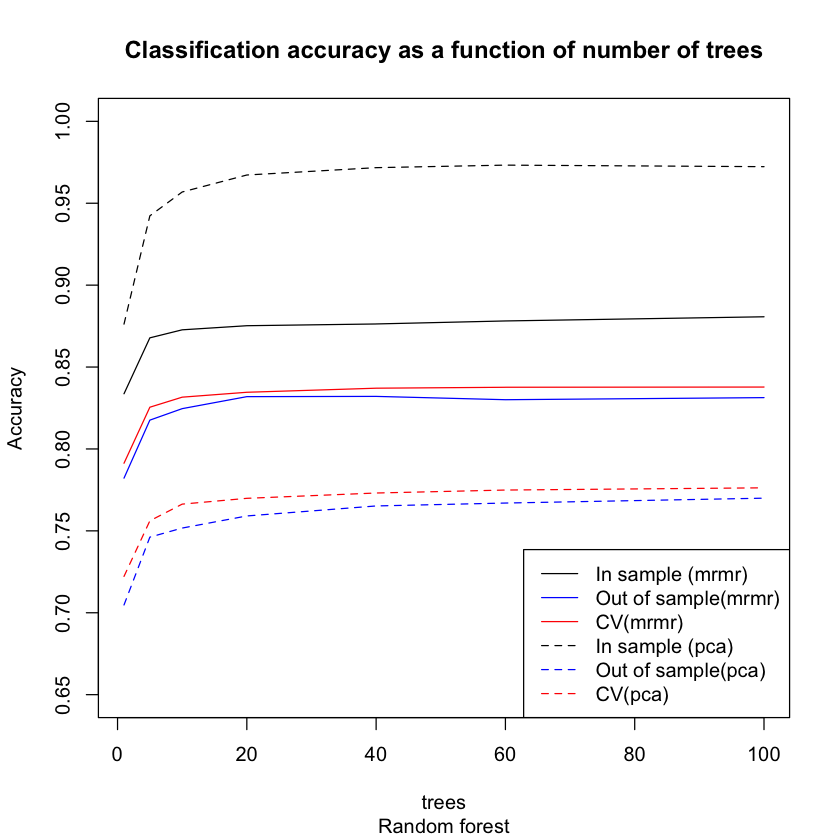

In [117]:
parameters <- list(1,5,10,20,40,60,100)
load("CV_random_forest_mrmr.Rdata")
plot_CV_mrmr ("trees","Random forest",c(0.65,1))
load("CV_random_forest_pca.Rdata")
plot_CV_pca()

The same behaviour as the previous model can be observed. Here the best number of tree is 100 which gives an accuracy on the cross validation of 83.78% (with MRMR). A stagnation of the gain of accuracy can be observed very quickly, pass 10 trees no significant gain of performance can be observed.

## Model 3

Here we will do a model based on Support Vector Machine. The svm function is used in order to create a model based on SVM. 2 important hyperparameters have to be set. We want to use the best parameter values to reach the highest accuracy as possible. To do so, preliminary tests were done in order to determine the range of the Gamma parameter and the Cost parameter.
The Gamma parameter seems to be more significant than the Cost parameter. Once the preliminary tests are done and that suitable set of Cost and Gamma are determined, we implement a grid search combined with a k-fold cross validation for varying values of Cost $\in \{2^{10},2^{11}\}$ and  Gamma $\in [0.001,0.007]$. Note that the data are preprocessed with smote.

In [2]:
#install.packages("e1071")
library(e1071)

In [4]:
#Load training dataset preprocessed with smote and mRMR
load(file = "data_preprocMMR.Rdata")
load(file = "test_preprocMMR.Rdata")

In [3]:
#Confusion Matrix and accuracy computation
computeResult <-function(Y_predict, Y_target){
    confusion_matrixSVM <- table(Y_predict, Y_target)
    confusion_matrixSVM
    accuracy <- (confusion_matrixSVM[1,1]+confusion_matrixSVM[2,2]+confusion_matrixSVM[3,3])/sum(confusion_matrixSVM)
    
    return (list(acc=accuracy, matrix=confusion_matrixSVM))
}

#### Grid search with K-fold cross validation

As said previously, to find the best hyperparameters of the SVM model in order to reach good performance, a grid search is executed with a cross validation.

In [4]:
crossValidationInOutSampleSVM <- function(cost=1000, gamma=0.001, k=10, data_in){
    data <- data_in
    accuracy_vec <- c()

    #Shuffle the dataset randomly
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    #Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))

    #For each unique group:
    for (i in 1:k){
        #Take the group as a hold out or test data set
        train_data <- data[-splits[[i]],]
        #Take the remaining groups as a training data set
        test_data <- data[splits[[i]],]
        
        #Fit a model on the training set and evaluate it on the test set
        model_svm <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)
        #Prediction on test set
        Y_hat <- predict(model_svm, test_data[, -target_variable])
        Y_target <- test_data[, target_variable]
       
        accuracy_vec[i] <- computeResults(Y_target, Y_hat, paste(i,"fold"))
    }

    #Results of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    #Results of in and out of sample
    accuracy <- inOutSampleTest(data,target_variable, data_idx, half_split, cost, gamma)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

In [5]:
inOutSampleTest <- function(data, target_variable, data_idx, half_split, cost, gamma){
    #Split training-test for in/out of sample predictions
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    train_label <- data[data_idx[1:half_split], target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)], target_variable]
    Y_target <- test_label

    #Model for in and out of sample
    model_single_out <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)

    #Prediction
    #In sample evaluation 
    Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
    #Out of sample evaluation 
    Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])

    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y_target, Y_hat_single_out_out_sample,"Out sample")
    
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}

Note that the dataset used here is down-sampling due to the very long running time for a SVM model. As a result, the number of sample in the preprocessed data is divided by 10.

In [6]:
applyCVInOutCompSVM <- function(costlist, gammalist, k, data_in){
    #Downsampling
    data_idx <- sample(1:nrow(data_in))
    split <- floor(nrow(data_in)/10)
    data <- data_in[data_idx[1:split],]
    
    accuracy_in_sample_vec1 <- numeric()
    accuracy_out_sample_vec1 <- numeric()
    accuracy_cv_vec1 <- numeric()
    accuracy_in_sample_vec2 <- numeric()
    accuracy_out_sample_vec2 <- numeric()
    accuracy_cv_vec2 <- numeric()
    
    print(paste("[INFO] - Testing C=",costlist[1]))
    for(gamma in gammalist){
        print(paste("[INFO] - Testing gamma=",gamma))
        results <- crossValidationInOutSampleSVM(costlist[1], gamma, k, data)
        accuracy_in_sample_vec1 <- c(accuracy_in_sample_vec1,results$in_sample)
        accuracy_out_sample_vec1 <- c(accuracy_out_sample_vec1,results$out_sample)
        accuracy_cv_vec1 <- c(accuracy_cv_vec1,results$cv)
    }
    print(paste("[INFO] - Testing C=",costlist[2]))
    for(gamma in gammalist){
        print(paste("[INFO] - Testing gamma=",gamma))
        results <- crossValidationInOutSampleSVM(costlist[2], gamma, k, data)
        accuracy_in_sample_vec2 <- c(accuracy_in_sample_vec2,results$in_sample)
        accuracy_out_sample_vec2 <- c(accuracy_out_sample_vec2,results$out_sample)
        accuracy_cv_vec2 <- c(accuracy_cv_vec2,results$cv)
    }
    
    return (list(in_sample1=accuracy_in_sample_vec1,out_sample1=accuracy_out_sample_vec1,cv1=accuracy_cv_vec1,
                in_sample2=accuracy_in_sample_vec2,out_sample2=accuracy_out_sample_vec2,cv2=accuracy_cv_vec2))
}

The grid search has been executed on the preprocessed data with mRMR and also with PCA and stored in different files for each feature selection technique in order to load them without the running time which is very long with a SVM model.   

[1] "[INFO] - Testing C= 1024"
[1] "[INFO] - Testing gamma= 0.001"
[1] "[INFO] - Confusion matrix 1 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                     800                     104            192
  functional needs repair        100                     617             50
  non functional                 146                      56            445
[1] "[INFO] - Accuracy 1 fold : 0.741832669322709"
[1] "[INFO] - Misclassification rate 1 fold : 0.258167330677291"
[1] "[INFO] - Confusion matrix 2 fold :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                     826                     107            193
  functional needs repair         75                     657             43
  non functional                 132                      48            429
[1] "[INFO] - Accuracy 2 fold : 0.761752988047809"
[1] "[INFO] - Misclass

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


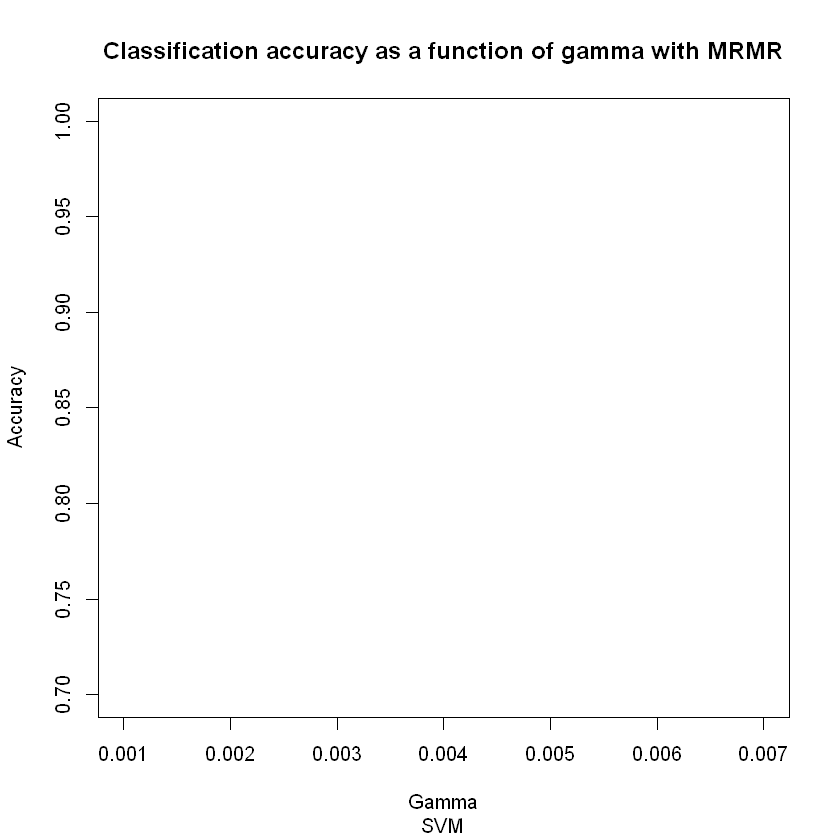

In [10]:
# #Load training dataset preprocessed with smote and mrMR
# load(file = "data_preprocMMR.Rdata")
# load(file = "test_preprocMMR.Rdata")
# k <- 2
# gammalist <- seq(0.001,0.005, 0.002)
# costlist <- c(2^{10}, 2^{11})
# accuracy_vec <- applyCVInOutCompSVM(costlist, gammalist, k, data_preproc)

# #Plot
# parameters <- list(0.001, 0.003, 0.005, 0.007)
# plot(parameters,seq(0.7,1, 0.1),type="n",main="Classification accuracy as a function of gamma with MRMR",xlab="Gamma",ylab="Accuracy",sub="SVM")
# lines(parameters,accuracy_vec$in_sample1)
# lines(parameters,accuracy_vec$out_sample1,col="blue")
# lines(parameters,accuracy_vec$cv1,col="red")
# lines(parameters,accuracy_vec$in_sample2,lty=2)
# lines(parameters,accuracy_vec$out_sample2,col="blue",lty=2)
# lines(parameters,accuracy_vec$cv2,col="red",lty=2)
# legend("right",legend=c("In sample(cost=1024)","Out of sample(cost=1024)","CV(cost=1024)",
#                           "In sample(cost=2048)","Out of sample(cost=2048)","CV(cost=2048)"),col=c("black","blue","red"),lty=c(1,1,1,2,2,2))


Experiments have been made upstream to save time.
Let's display the results obtained from the grid searches.

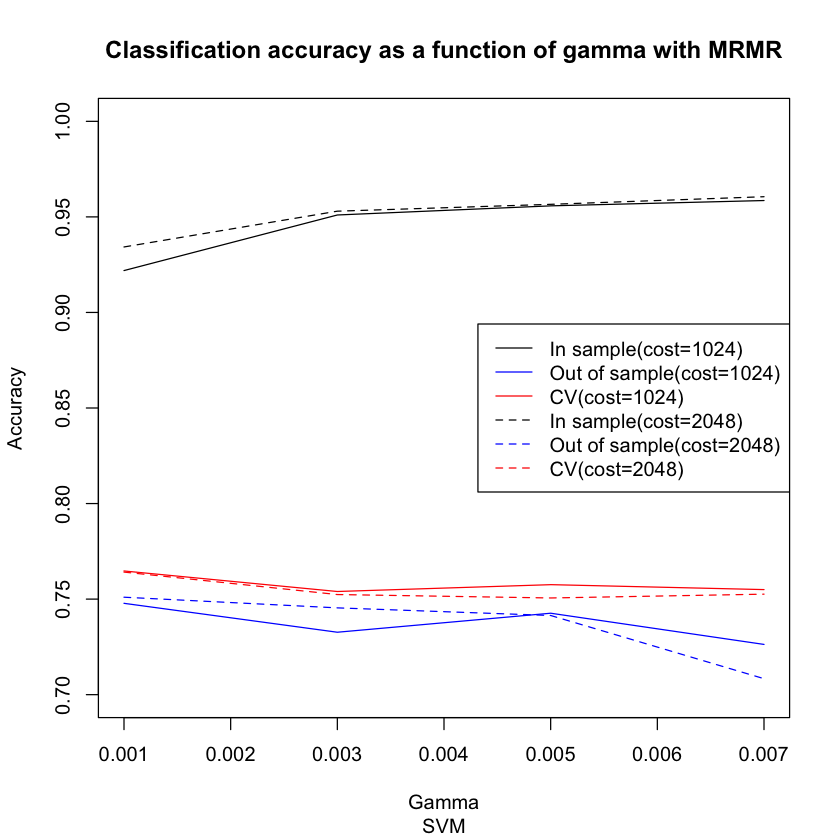

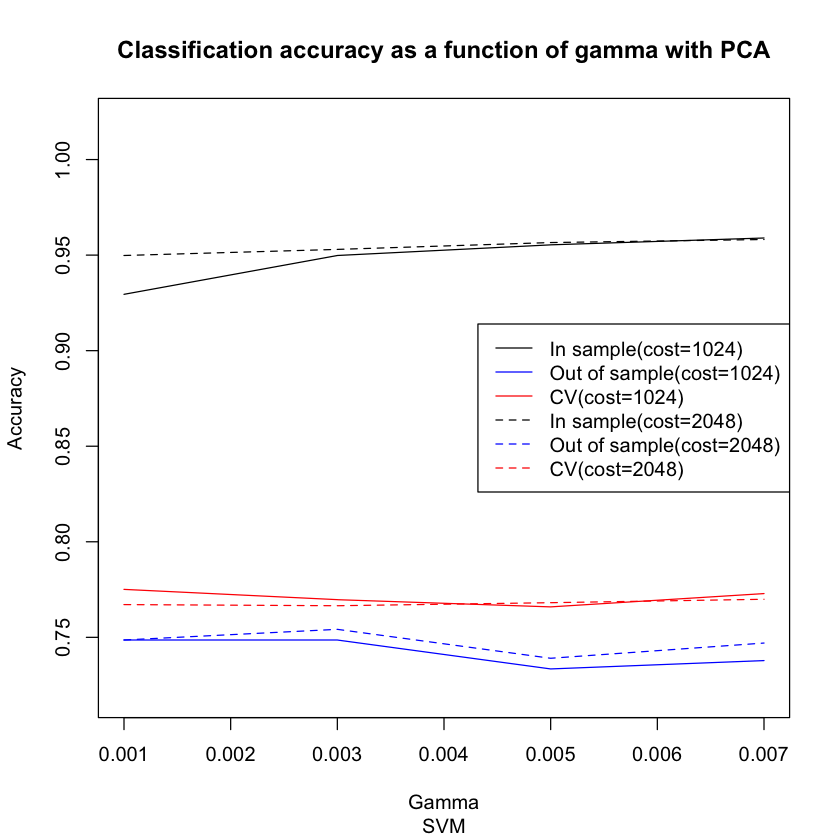

In [8]:
#Plot of MRMR
load("CV_svm_mrmr.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.7,1, 0.1),type="n",main="Classification accuracy as a function of gamma with MRMR",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$in_sample1)
lines(parameters,accuracy_vec$out_sample1,col="blue")
lines(parameters,accuracy_vec$cv1,col="red")
lines(parameters,accuracy_vec$in_sample2,lty=2)
lines(parameters,accuracy_vec$out_sample2,col="blue",lty=2)
lines(parameters,accuracy_vec$cv2,col="red",lty=2)
legend("right",legend=c("In sample(cost=1024)","Out of sample(cost=1024)","CV(cost=1024)",
                          "In sample(cost=2048)","Out of sample(cost=2048)","CV(cost=2048)"),col=c("black","blue","red"),lty=c(1,1,1,2,2,2))

#Plot of PCA
load("CV_svm_pca.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.72, 1.02, 0.1),type="n",main="Classification accuracy as a function of gamma with PCA",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$in_sample1)
lines(parameters,accuracy_vec$out_sample1,col="blue")
lines(parameters,accuracy_vec$cv1,col="red")
lines(parameters,accuracy_vec$in_sample2,lty=2)
lines(parameters,accuracy_vec$out_sample2,col="blue",lty=2)
lines(parameters,accuracy_vec$cv2,col="red",lty=2)
legend("right",legend=c("In sample(cost=1024)","Out of sample(cost=1024)","CV(cost=1024)",
                          "In sample(cost=2048)","Out of sample(cost=2048)","CV(cost=2048)"),col=c("black","blue","red"),lty=c(1,1,1,2,2,2))

We observe that when the MRMR is used on the preprocessed data, the cross validation provides a good accuracy in comparison to the in and out sample for both values of the cost parameter. Furthermore, it seems like the best gamma is 0.001 with a accuracy of 76.47% for a cost of 1024 and 76.41% for a cost of 2048. The cost parameter is not significant, we will thus choose to use the value 1024 as it will be more efficient.

Then, we also observe that the cross validation on the preprocessed data using PCA generates better accuracies than the in and out sample. Moreover, the two values of the cost parameter are also equivalent here and the best gamma is 0.001 as for the MRMR. 

Let's compare the two cross validation of MRMR and PCA.

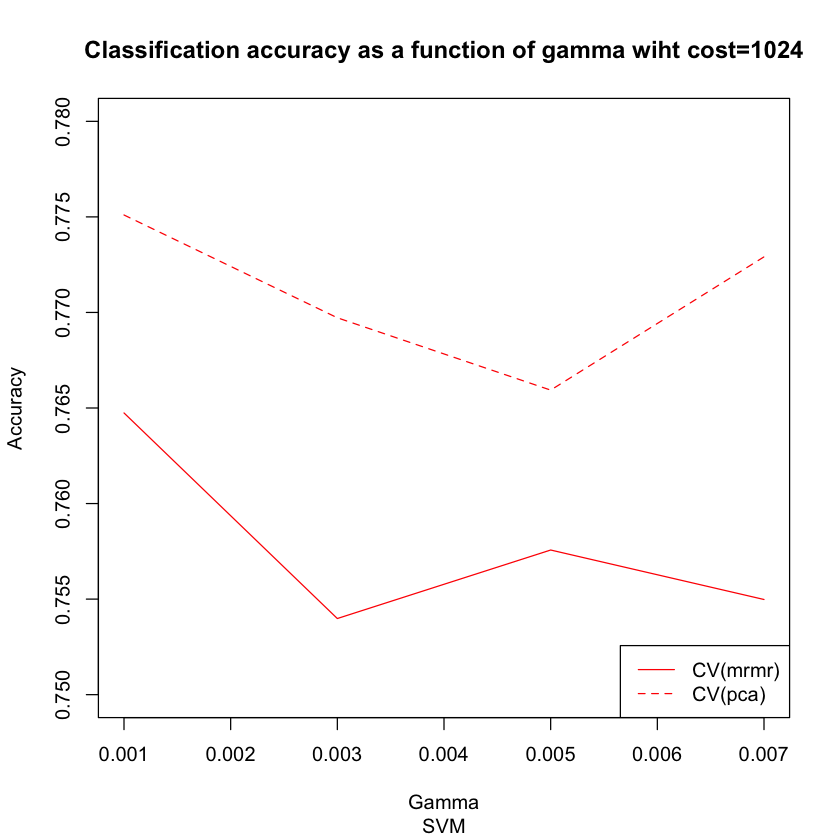

In [9]:
##plot of PCA and MRMR
load("CV_svm_mrmr.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.75,0.78, 0.01),type="n",main="Classification accuracy as a function of gamma wiht cost=1024",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$cv1,col="red")
load("CV_svm_pca.Rdata")
lines(parameters,accuracy_vec$cv1,col="red",lty=2)
legend("bottomright",legend=c("CV(mrmr)", "CV(pca)"),col=c("red"),lty=c(1,2))

We see that the cross validation with pca is slightly better than mrmr with an accuracy of 77.51% for gamma=0.001 which is only a difference of less than 1% with the mrmr.

We test the model by executing a prediction on the test dataset. The package "e1071" allows to present the decision values of the model. Since there are 3 classes in the given dataset, the SVM model has to do 3 binary classifications. Then, it will majority vote for the dominant class among the 3 as shown in the table below. 

## Bagging function

In [15]:
BaggingSVM <- function(n_bagging_resamples=10, data){
    #Downsampling
    data_idx <- sample(1:nrow(data))
    split <- floor(nrow(data)/3)
    data <- data[data_idx[1:split],]
    
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # Shuffle the dataset randomly
    data_idx <- sample(1:nrow(data))
    
    # Split shuffled dataset into training and test set
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    n_train <- nrow(train_data)
    Y_hat_bagged <- array(0, c(length(test_data), 1))
    Y <- test_data[,target_variable]
    Y_pred_models <- numeric()
    accuracy_vec <- array(0, c(1, n_bagging_resamples))

    for (i in 1:n_bagging_resamples){
        message(i)
      #Resample data from the training set
        I_bag <- sample(seq(1, n_train), replace=TRUE)
        #I_bag <- sample(seq(1, 15*n_train), replace=T)
        trainbis_data <- train_data[I_bag,]
        message(dim(trainbis_data))

        #verif_variance <- apply(trainbis_data[, -ncol(trainbis_data)], 2, function(x) var(x,na.rm=T)!=0)
        #while (!all(verif_variance)){
        #    I_bag <- sample(seq(1, n_train), replace=TRUE)
        #    #I_bag <- sample(seq(1, 15*n_train), replace=T)
        #    trainbis_data <- train_data[I_bag,]
        #    verif_variance <- apply(trainbis_data[, -ncol(trainbis_data)], 2, function(x) var(x,na.rm=T)!=0) 
        #}
        #message("coupe au bol")
        
      #Fit model
        model <- svm(status_group ~ ., data=trainbis_data, gamma=0.001, cost=2^{10})
        Y_pred <- predict(model, test_data[, -target_variable])
        Y_pred_models <- cbind(Y_pred_models, as.character(Y_pred))
        accuracy_vec[i] <- computeResults(Y, Y_pred, paste(i,"th model"), verbose=F)

      #Store model
        if(i==1){
            models_bagged<-list(model)
        }else{
            models_bagged <- c(models_bagged,list(model))
        }
    }
    
    message("single model")
    #Majority vote of the classifiers to make the prediction
    Y_hat_bagged <- apply(Y_pred_models, 1, function(x) names(which.max(table(x))))
    accuracy_bag <- computeResults(Y, Y_hat_bagged, "bagged model")
    print(accuracy_bag)

    #Single model
    model_single_out <- svm(status_group ~ ., data=train_data, gamma=0.005, cost=2^{10})
    message("prediction of single model")
    Y_pred_single_out <- predict(model_single_out, test_data[, -target_variable])     
    accuracy_single_out <- computeResults(Y, Y_pred_single_out, "single model")

    return(list(accuracy_bagged = accuracy_bag, accuracy_simple=accuracy_single_out, 
             bagging_accuracies = accuracy_vec,
             bag_models = models_bagged, single_model = model_single_out))
}

The technique of bagging is also used on the SVM model in order to confirm whether it will improve or not  the SVM model performance. We will use the data preprocessed with pca and the best parameters found above which is gamma=0.001 and cost=1024.

In [83]:
load(file = "data_preproc_pca.Rdata")
load(file = "test_preproc_pca.Rdata")

In [84]:
results <- BaggingSVM(n_bagging_resamples=4, data_preproc)

1

1326051

2

1326051

3

1326051

4

1326051

5

1326051

single model



[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6381                     580           1581
  functional needs repair        136                     173             71
  non functional                 718                     173           3448
[1] "[INFO] - Accuracy bagged model : 0.754241761556444"
[1] "[INFO] - Misclassification rate bagged model : 0.245758238443556"
[1] 0.7542418


prediction of single model



[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    6063                     467           1327
  functional needs repair        259                     265            146
  non functional                 913                     194           3627
[1] "[INFO] - Accuracy single model : 0.750697534122615"
[1] "[INFO] - Misclassification rate single model : 0.249302465877385"


In [4]:
acc_bag <- results$accuracy_bagged
acc_simple <- results$accuracy_simple
bag.models <- results$bag_models
single.model <- results$single_model
save(acc_bag, acc_simple, bag.models, single.model, file = "SVM_bag100_pca.Rdata")

ERROR: Error in eval(expr, envir, enclos): object 'results' not found


In [8]:
load(file="SVM_bag100_mrmr.Rdata")
acc_simple
acc_bag

[1] 0.8131697

[1] 0.7300721

In [18]:
install.packages('magick')


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpeluvjN/downloaded_packages


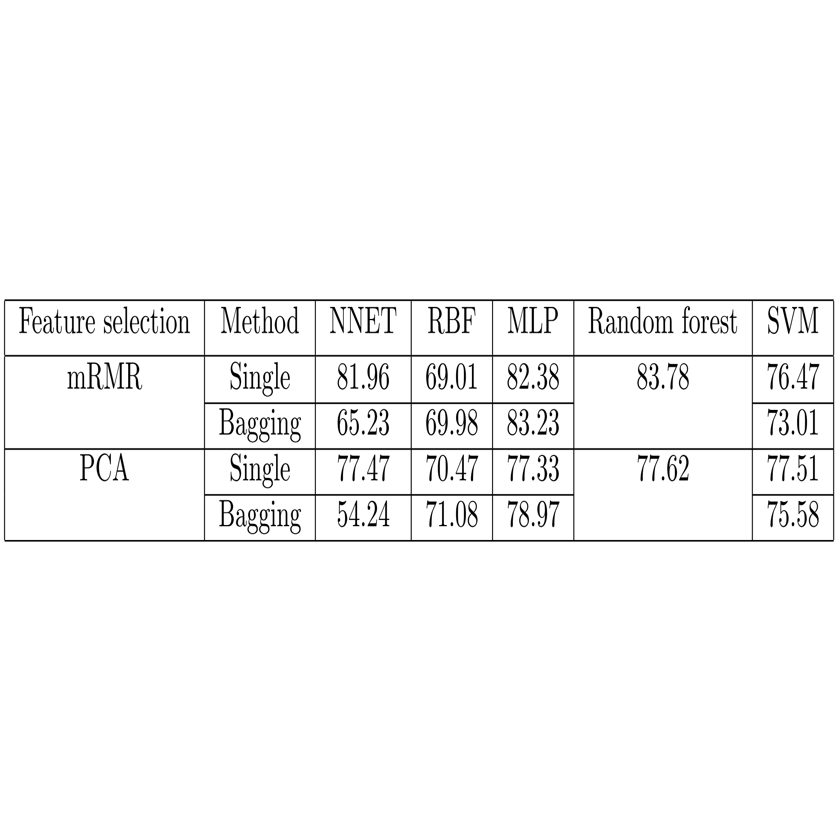

In [21]:

library(magick)
#img <- magick::image_read("final_tab2.PNG")
#print("Recapitulative table of the accuracy metric of the different models")
#image_info(img)

#img<-image_scale(img,"70x5")
#img<-image_width(img,"7000")
#plot(img)

library("png")

img <- readPNG("final_tab.PNG")
grid::grid.raster(img,width=1,height=0.3,interp=TRUE)

# Alternative models





The best model in the previous section being the Random Forest, a tree based model seemed to be the natural choice when picking an alternative model. Gradient boosting trees use an ensemble of weak prediction models (typically decision trees), and use gradient based methods in order to optimize the cost function (minimize it). This model typically outperforms Random Forest, so it seemed like a pertinent choice.

The $xgboost$ library will be used, as it is highly efficient and provides parallel tree boosting which considerably accelerates the process.

## Gradient boosting

In [42]:
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFiWOhY/downloaded_packages


In [22]:
require(xgboost)

Loading required package: xgboost



## Hyperparameter selection / Embedded feature selection

Previously, the mRMR and PCA feature selection methods were used with a specific constant number of features. In this final model, an embedded feature selection method is applied, in order to determine which is the best number of features to take from mRMR and PCA in order to generate the best possible results. This feature selection method will also be combined with a hyperparameter selection.

The gradient boosting trees have 8 important hyperparamters to be set. Therefore, having a grid of parameters quickly leads to huge execution times. This is why we opted for a randomized approach. Hyperparameters are chosen in a semi-random way (randomly from a certain range of numbers). This allows to have quite a wide range of possible combinations (although not exchaustive of course). After several tests, the ranges of the parameters were constrained further, to obtain better quality results. The best number of features and the best hyperparameters will be kept for the next steps.

The pseudo code for the following function is :

```
for several numbers of features kept from mRMR or PCA:
    for i in 1:30:
        randomly select parameters
        apply 5-fold cross-validation with gradient boosting trees
        if a better solution is found:
            store the hyperparameters and the number of features
return the best hyperparameters and the best number of features

```

In [71]:
get_best_params <- function(train_data_init,ordered_features) {
#Runs a gradient boosting tree model using 5-fold cross-validation, by picking randomly 
#the hyperparameters and for different numbers of features (used for mRMR and PCA) as 
#an embedded feature selection procedure.

#param train_data_init : data on which the xgboost does cross-validation
#param ordered_features : feature indexes in their order of importance (following the order
#                         produced by mRMR or PCA)
#return : the best hyperparameters and the best number of features
                                                               
    #Initializing the values to be returned
    best_k <- 0
    best_param = list()
    best_seednumber = 1234
    best_loss = Inf
    best_loss_index = 0
    best_losses_per_k <- c()

    #Going through several number of selected features (k is the number of features to be taken,
    #i.e if k=30 with PCA, cross-validation will be done on the 30 first PCA features)
    for(k in c(40,200,20)) {
        #Training data
        train_data <- train_data_init[,ordered_features[1:k]]
        train_data <- cbind(train_data,subset(train_data_init,select=c(status_group)))

        target_variable <- ncol(train_data)
        labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1
        
        #Stores the best loss (aka the minimal value of the error function) for each k
        best_k_loss <- Inf
        
        #Cross-validation is repeated 30 times
        for (iter in 1:30) {
            #Semi-random selection of hyperparameters
            param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = sample(10:20, 1),
                eta = runif(1, .001, .3),
                gamma = runif(1, 0.0, 0.2),
                subsample = runif(1, .6, .9),
                colsample_bytree = runif(1, .5, .8), 
                min_child_weight = sample(1:30, 1),
                max_delta_step = sample(7:12, 1)
            )
            seed.number <- sample.int(1000, 1)[[1]]
            set.seed(seed.number)

            #Gradient boosting tree with 500 rounds (at maximum, because the cross-validation 
            #is halted if after 10 successive rounds the loss has not decreased) and 5-fold cross-validation
            cv.nround <- 500
            cv.nfold <- 5

            #Running cross-validation on the training data with the parameters specified earlier
            bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param, booster = "gbtree",
                                nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

            #Finding at which round the loss was minimal during the cross-validation
            min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
            min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
            message(min_loss_index)

            #If a new best solution is found, the hyperparameters and results are stored
            if (min_loss < best_loss) {
                best_loss <- min_loss
                best_loss_index <- min_loss_index
                best_seednumber <- seed.number
                best_param <- param
                best_k <- k
                message("BEST")
                message(best_param)
                message(best_k)
                message(best_seednumber)
            }
            
            #If a new best solution for this particular k is found, the corresponding value is stored
            if (min_loss < best_k_loss) {
                best_k_loss <- min_loss
            }
        }
        #Update the list of all best solutions for all k values
        best_losses_per_k <- c(best_losses_per_k,best_k_loss)
    }
    return(list(best_loss,best_loss_index,best_seednumber,best_param,best_k,best_losses_per_k))
}

In [72]:
evaluate_model <- function(df,params,seed,nround,print_importance = FALSE) {
#Evaluates a gradient boosting tree model on a given dataset. Performs the split
#into training set and test set, and uses the given parameters to establish a prediction
#and print out relevant information like the confusion matrix, the accuracy or even
#the importance of each feature.
#
#param df : dataset
#param params : parameters to be used in the gradient boosting tree
#param seed : random seed to be used (for reproducible results)
#param nround : number of rounds the gradient boosting tree should run for
#param print_importance : if TRUE, prints the most 10 important features
   
    #50-50 split
    data_idx <- sample(1:nrow(df))
    half_split <- floor(nrow(df)/2)
    train_data <- df[data_idx[1:half_split],]
    test_data <- df[data_idx[(half_split+1):nrow(df)],]
    
    training_labels <- as.matrix(as.numeric(train_data[,ncol(train_data)])) - 1
    test_labels <- factor(as.numeric(test_data[,ncol(train_data)]))
    
    set.seed(seed)
    
    #Train the gradient boosting model
    model <- xgboost(data = as.matrix(subset(train_data,select=-c(status_group))),label=training_labels, params=params, nrounds=nround,booster = "gbtree", nthread=6)
    
    #Predictions on the test set
    pred <- predict(model, as.matrix(subset(test_data,select=-c(status_group))),reshape = T) 
    predicted_labels <- factor(max.col(pred),levels=1:3)

    #Print the results
    cm <- caret::confusionMatrix(test_labels,predicted_labels)
    print(cm)
    print(cm$overall['Accuracy'])
    if(print_importance) {
        importanceRaw <- xgb.importance(feature_names = colnames(train_data), model = model, data = as.matrix(subset(train_data,select=-c(status_group))),label=training_labels)
        head(importanceRaw,10)
        xgb.plot.importance(importance_matrix = importanceRaw[1:10])
    }
}

To avoid recomputing the mRMR feature selection everytime, it is done once and will be reused throughout the next sections :

In [73]:
df_mrmr <- merge(X,Y)
df_mrmr <- preprocess_basic_training(df_mrmr)
df_no_status <- subset(df_mrmr,select=-c(status_group))
df_mrmr <- cbind(df_no_status,subset(df_mrmr,select=c(status_group)))
ordered_features <- apply_mrmr_numerical(df_mrmr)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

### mRMR with SMOTE


First of all the best hyperparameters are found for a data preprocessed using mRMR and SMOTE. This hyperparameter selection takes several hours to run and is __not recommended to execute__.

In [3]:
get_best_params_mrmr_smote <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR and SMOTE
    
    df <- create_smote_dataset(df_mrmr)
    res <- get_best_params(df,ordered_features)

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

The best hyperparameters are represented below, and a model is created based on these parameters. After evaluation on a test set to figure out the accuracy, the result is around 84.45%. This is by far the best accuracy we have computed throughout the project.

In [5]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 15,
                eta = 0.165468964137603,
                gamma = 0.101486052945256,
                subsample = 0.841254485514946,
                colsample_bytree = 0.748106639110483, 
                min_child_weight = 1,
                max_delta_step = 10
            )
best_seed <- 25
best_k <- 80
nround <- 145

df_train <- create_smote_dataset(cbind(df_mrmr[,ordered_features[1:best_k]],subset(df_mrmr,select=c(status_group))))

evaluate_model(df_train,param,best_seed,nround)

ERROR: Error in merge(X, Y): object 'X' not found


### mRMR without SMOTE

However, when publishing the predictions on DrivenData, we saw there was quite a gap between this accuracy and the one obtained on the competition. This is mainly due to the fact that SMOTE modifies the dataset _too much_, and that it does not really reflect the data on which the model is evaluated on DrivenData. We therefore decided to use mRMR without SMOTE. The same 2 steps are followed, and once again running the hyperparameter takes several hours and is __not recommended to run__.

In [5]:
get_best_params_mrmr_no_smote <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR

    res <- get_best_params(df_mrmr,ordered_features)

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

Once again, a model is created using the best hyperparameters and the accuracy is 79.81%. Notice that in the results, it is clear that the misclassification rate is higher for the class that is the least represented (*functional needs repair*). This was expected because of the lack of data balancing in this case. In particular, the sensitivity is very low for that class, meaning the number of true positives compared to the number of true positives and false negatives is very low.

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 17,
                eta = 0.0755197018329054,
                gamma = 0.0943593920674175,
                subsample = 0.806684761145152,
                colsample_bytree = 0.603914480283856, 
                min_child_weight = 2,
                max_delta_step = 12
            )
best_seed <- 998
best_k <- 150
nround <- 100

evaluate_model(cbind(df_mrmr[,ordered_features[1:best_k]],subset(df_mrmr,select=c(status_group))),param,best_seed,nround)

### PCA

The same process is applied to preprocessing using PCA, the best hyperparameters are found, and the final result is an accuracy of 78.35%.

In [6]:
get_best_params_pca <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR
    df <- merge(X,Y)
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    X_pca <- pca(df)
    X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
    X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

    res <- get_best_params(X_pca,1:ncol(X_pca))

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 11,
                eta = 0.128285527412547,
                gamma = 0.0288312798831612,
                subsample = 0.757424440677278,
                colsample_bytree = 0.762188565917313, 
                min_child_weight = 13,
                max_delta_step = 7
            )

best_k <- 75
best_seed <- 734
nround <- 75

df <- merge(X,Y)
df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
X_pca <- pca(df)
X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

evaluate_model(cbind(X_pca[,1:best_k],subset(X_pca,select=c(status_group))),param,best_seed,nround)

To sum up, the best accuracy is obtained with data using mRMR and SMOTE (but does not necessarily mean it will behave better on DrivenData as explained previously). The mRMR without SMOTE yields the second best result, and the PCA the worst result out of the 3. These observations are summarized below :

In [75]:
accuracies <- c(84.45,79.81,78.35)
preprocessing_methods <- c("mRMR + SMOTE","mRMR","PCA")
data.frame(method=preprocessing_methods,accuracy=accuracies)

method,accuracy
<chr>,<dbl>
mRMR + SMOTE,84.45
mRMR,79.81
PCA,78.35


## Ensemble learning

The results obtained could be further improved by using ensemble learning, which is known to reduce the variance of the prediction without affecting its bias. Indeed, the predictions depend on a random seed, and we could maintain all hyperparameters constant and make the seed vary, to obtain a wide series of (hopefully) good quality solutions. A majority vote could be applied to this result in order to produce the final prediction. The main downside of this method is that the exdcution times are sometimes quite long as the model is trained multiple times.

The only hyperparameter that will be changed throughout the algorithm is the number of rounds; because the best solution does not always come after the same amount of rounds. Therefore 5-fold cross-validation is applied and the optimal numnber of rounds is found. A gradient boosting tree model is then trained with these parameters and a prediction is made for the labels of the test set. The predictions on the test set for each random seed are stored in the $solutions$ dataframe (each column corresponds to predictions using a certain seed).

The pseudo-code for the following algorithm is :

```
set the hyperparameters to the optimal hyperparameters identified previously
for i in 1:15:
    change the random seed
    apply 5-fold cross-validation with a gradient boosting tree in order to find the best number of rounds
    identify the number of rounds with minimal loss
    train a gradient boosting tree with the optimal hyperparameters
    predict the labels of the test set
    add the prediction to the solutions dataframe
```

In [82]:
ensemble_gradient_boost <- function(train_data,test_data,param) { 
#Applies an ensemble of gradient boosting trees in order to predict labels of
#a test set. The hyperparameter settings are chosen according the the results of the
#previous algorithm. The number of rounds is dependant on the seed, and is therefore 
#chosen by cross-validation.
#
# param train_data : data on which the xgboost trains
# param test_data : data on which we have to predict the labels
# return : the ensemble of all predictions of all models used in the function

    #Dataframe with a single column, in which each column apart from the first one
    #will contain predictions of the test set labels.
    solutions <- data.frame(nb=1:nrow(test_data))

    target_variable <- ncol(train_data)

    labels_train <- as.numeric(train_data[,target_variable]) - 1

    #5-fold cross-validation with 500 rounds (at maximum, because the cross-validation 
    #is halted if after 10 successive rounds the loss has not decreased)
    cv.nround <- 500
    cv.nfold <- 5

    #Number of learners used in the ensemble of models
    for(i in 2:10) {
        #Change the seed to have (possibly) a different outcome than at the previous iteration
        set.seed(i)
        
        #Apply cross-validation
        bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label = labels_train,params = param, booster = "gbtree",
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

        #Find the number of rounds for which the loss was minimal
        min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
        min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
        message(min_loss_index)

        #Train a model using the previously found hyperparameters and the best number of rounds
        md <- xgboost(data = as.matrix(train_data[,-target_variable]),label = labels_train,params=param, nrounds=min_loss_index, nthread=6)

        #Predict the labels of the test set
        pred <- predict(md, as.matrix(test_data),reshape = T)
        
        #The objective is softprob, which means we get as output the probaboilities of each class.
        #We therefore select the class with the maximal probability.
        pred <- factor(max.col(pred),levels=1:3)

        #Add the predictions to the dataframe containing the prediction of all learners
        solutions[,i]<-pred
    }
    return(solutions)
}

In [78]:
get_predictions <- function(solutions) {
#Converts the solutions returned by the ensemble learning procedure into correclty
#formatted predictions. A majority vote is applied for each sample in order to 
#yield a prediction.
#
# param solutions : dataframe containing the prediction of all the models of the
#                   ensemble of models
# return : the predictions obtained by majority vote
    
    #For each sample, count the number of votes for each class
    count_1 <- rowSums(subset(solutions,select=-(nb)) == 1)
    count_2 <- rowSums(subset(solutions,select=-(nb)) == 2)
    count_3 <- rowSums(subset(solutions,select=-(nb)) == 3)
    counts <- cbind(count_1,count_2,count_3)

    prediction <- c()
    #Keep the most represented class for each sample
    for(i in 1:nrow(test_data)) {
        prediction[i] <- which.max(counts[i,])
    }
    prediction <- as.data.frame(prediction)
    prediction$prediction <- as.factor(prediction$prediction)
    return(prediction)
}


## Testing the accuracy of the ensemble of models

We now test if the presented ensemble of models actually yields better results, both with and without SMOTE. The previously obtained optimal parameters are kept in both cases. The run can be very long, especially if the number of evaluated models in the ensemble of models is big (large number of repetitions of the for loop in the function *ensemble_gradient_boost*. In order to still be able to show that the ensemble of models works, the size of the training set was considerably reduced (it was normally a 50-50 split). Therefore, in order to obtain the best results that will be presented, you can uncomment the explicitly mentioned lines, but the execution time will be quite long. 

## mRMR with SMOTE

The results when using a 50-50 split between training and testing datasets is around 85.05%, which is an improvement compared to the previously found accuracy of 84.45% without the ensemble of models. 

In [79]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 15,
                eta = 0.165468964137603,
                gamma = 0.101486052945256,
                subsample = 0.841254485514946,
                colsample_bytree = 0.748106639110483, 
                min_child_weight = 1,
                max_delta_step = 10
            )

best_k <- 80

df <- create_smote_dataset(df_mrmr)

data_idx <- sample(1:nrow(df))
half_split <- floor(nrow(df)/10)

#UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
#half_split <- floor(nrow(df)/2)

train_data <- cbind(df[data_idx[1:half_split],ordered_features[1:best_k]],subset(df[data_idx[1:half_split],],select=c(status_group)))
test_data <- df[data_idx[(half_split+1):nrow(df)],ordered_features[1:best_k]]

solutions <- ensemble_gradient_boost(train_data,test_data,param)
predictions <- get_predictions(solutions)

#Represent the results of the prediction on the test set in a confusion matrix
caret::confusionMatrix(factor(as.numeric(df[data_idx[(half_split+1):nrow(df)],ncol(df)])),predictions$prediction)

  amount_tsh date_recorded funder gps_height installer num_private region_code
2          0          3064      0       1978         0           0          11
3          0          3086      0          0         0           0           1
4         10          3885      0       1639         0           0           3
5          0          3081      0          0         0           0           1
6         50          3057      0         28         0           0          60
7          0          3659      1          0         0           0          17
  district_code population public_meeting permit construction_year_1960s
2             4         20              1      0                       0
3             4          0              1      1                       0
4             5         25              1      1                       0
5             4          0              1      1                       0
6            43       6922              1      0                       0
7        

[1]	train-merror:0.140637+0.003070	test-merror:0.229286+0.010296 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 10 rounds.

[2]	train-merror:0.124701+0.004165	test-merror:0.214341+0.010862 
[3]	train-merror:0.118177+0.003408	test-merror:0.210556+0.008010 
[4]	train-merror:0.112997+0.003257	test-merror:0.210357+0.007762 
[5]	train-merror:0.108317+0.001219	test-merror:0.207966+0.009783 
[6]	train-merror:0.102440+0.001895	test-merror:0.204578+0.008392 
[7]	train-merror:0.098705+0.002319	test-merror:0.206572+0.008009 
[8]	train-merror:0.095966+0.002870	test-merror:0.206971+0.010918 
[9]	train-merror:0.093426+0.002234	test-merror:0.206374+0.010977 
[10]	train-merror:0.091782+0.003357	test-merror:0.204182+0.010315 
[11]	train-merror:0.088197+0.001719	test-merror:0.205973+0.008727 
[12]	train-merror:0.085458+0.001762	test-merror:0.206173+0.008694 
[13]	train-merror:0.083117+0.002547	test-merror:0.205974+0.009103 
[1

10



[1]	train-merror:0.138048 
[2]	train-merror:0.131474 
[3]	train-merror:0.122311 
[4]	train-merror:0.116534 
[5]	train-merror:0.115538 
[6]	train-merror:0.108566 
[7]	train-merror:0.106773 
[8]	train-merror:0.103187 
[9]	train-merror:0.100398 
[10]	train-merror:0.099602 
[1]	train-merror:0.143576+0.004662	test-merror:0.232470+0.009051 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 10 rounds.

[2]	train-merror:0.128934+0.003222	test-merror:0.222909+0.002631 
[3]	train-merror:0.118476+0.002252	test-merror:0.217131+0.005188 
[4]	train-merror:0.113944+0.002480	test-merror:0.212751+0.008412 
[5]	train-merror:0.106823+0.003078	test-merror:0.211158+0.011443 
[6]	train-merror:0.103685+0.003723	test-merror:0.208368+0.007578 
[7]	train-merror:0.100149+0.002268	test-merror:0.207971+0.011261 
[8]	train-merror:0.097510+0.002904	test-merror:0.206377+0.010077 
[9]	train-merror:0.093924+0.002556	test-merror:0.207570+0.009114 

8



### mRMR without SMOTE

We apply exactly the same measures as previously but without using SMOTE. Once again the *optimal* execution is very long, but can be done by uncommenting the indicated line.

Without using SMOTE, we obtain an accuracy of around 80.5% using the ensemble of models, which is a slight improvement over the 79.81% accuracy we had obtained without the ensemble learning.

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 17,
                eta = 0.0755197018329054,
                gamma = 0.0943593920674175,
                subsample = 0.806684761145152,
                colsample_bytree = 0.603914480283856, 
                min_child_weight = 2,
                max_delta_step = 12
            )

best_k <- 150

data_idx <- sample(1:nrow(df_mrmr))
half_split <- floor(nrow(df_mrmr)/8)

#UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
#half_split <- floor(nrow(df)/2)

train_data <- cbind(df_mrmr[data_idx[1:half_split],ordered_features[1:best_k]],subset(df_mrmr[data_idx[1:half_split],],select=c(status_group)))
test_data <- df_mrmr[data_idx[(half_split+1):nrow(df_mrmr)],ordered_features[1:best_k]]

solutions <- ensemble_gradient_boost(train_data,test_data,param)
predictions <- get_predictions(solutions)

#Represent the results of the prediction on the test set in a confusion matrix
caret::confusionMatrix(factor(as.numeric(df_mrmr[data_idx[(half_split+1):nrow(df_mrmr)],ncol(df_mrmr)])),predictions$prediction)

### PCA

The same test is applied to PCA, and gives a result of 79.11%.

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 11,
                eta = 0.128285527412547,
                gamma = 0.0288312798831612,
                subsample = 0.757424440677278,
                colsample_bytree = 0.762188565917313, 
                min_child_weight = 13,
                max_delta_step = 7
            )

best_k <- 75

df <- merge(X,Y)
df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
X_pca <- pca(df)
X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

data_idx <- sample(1:nrow(X_pca))
half_split <- floor(nrow(X_pca)/8)

#UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
#half_split <- floor(nrow(df)/2)

train_data <- cbind(X_pca[data_idx[1:half_split],1:best_k],subset(X_pca[data_idx[1:half_split],],select=c(status_group)))
test_data <- X_pca[data_idx[(half_split+1):nrow(X_pca)],1:best_k]

solutions <- ensemble_gradient_boost(train_data,test_data,param)
predictions <- get_predictions(solutions)

#Represent the results of the prediction on the test set in a confusion matrix
caret::confusionMatrix(factor(as.numeric(X_pca[data_idx[(half_split+1):nrow(X_pca)],ncol(X_pca)])),predictions$prediction)

The observed results are summarized below :

In [81]:
accuracies_single <- c(84.45,79.81,78.35)
accuracies_ensemble <- c(85.05,80.5,79.11)
preprocessing_methods <- c("mRMR + SMOTE","mRMR","PCA")
data.frame(method=preprocessing_methods,"single model accuracy"=accuracies,"ensemble of models accuracy"=accuracies_ensemble,"improvement"=accuracies_ensemble-accuracies_single)

method,single.model.accuracy,ensemble.of.models.accuracy,improvement
<chr>,<dbl>,<dbl>,<dbl>
mRMR + SMOTE,84.45,85.05,0.60
mRMR,79.81,80.50,0.69
PCA,78.35,79.11,0.76


## Applying the ensemble of models to the DrivenData dataset

Now, we finally try to predict the accuracy of our model on the DrivenData dataset. This is done once by using the SMOTE data balancing and once without SMOTE. Bare in mind that SMOTE does affect the data itself, and that it may be less representative of the *pure* data contained in the DrivenData dataset. This is why both methods were tested.

The predictions have to be transformed into the appropriate strings in order to satisfy the submission conditions imposed by DrivenData, and the *id* of the samples has to be present. The following function is used in order to submit a prediction and write it to the ```submission.csv``` file.

In [10]:
submit_results <- function(prediction) {
    pred <- ifelse(prediction$prediction == 1,"functional",ifelse(prediction$prediction == 2, "functional needs repair", "non functional"))
    res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
    write.csv(res,"submission.csv",row.names=FALSE)
}

### mRMR with SMOTE

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 15,
                eta = 0.165468964137603,
                gamma = 0.101486052945256,
                subsample = 0.841254485514946,
                colsample_bytree = 0.748106639110483, 
                min_child_weight = 1,
                max_delta_step = 10
            )

df <- cbind(df_mrmr[,ordered_features[1:80]],subset(df_mrmr,select=c(status_group)))
df <- create_smote_dataset(df)
df_no_status <- subset(df,select=-c(status_group))
df_no_status <- df_no_status[,order(names(df_no_status))]
df <- cbind(df_no_status,subset(df,select=c(status_group)))

write(colnames(subset(df,select=-c(status_group))),"features.txt")

train_data <- df
test_data <- preprocess_test(eval_data,FALSE)

head(train_data)
head(test_data)

solutions <- ensemble_gradient_boost(train_data,test_data,param)
prediction <- get_predictions(solutions)
submit_results(prediction)

### mRMR without SMOTE

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 17,
                eta = 0.0755197018329054,
                gamma = 0.0943593920674175,
                subsample = 0.806684761145152,
                colsample_bytree = 0.603914480283856, 
                min_child_weight = 2,
                max_delta_step = 12
            )

df <- cbind(df_mrmr[,ordered_features[1:150]],subset(df_mrmr,select=c(status_group)))
df <- df[,order(names(df))]
df_no_status <- subset(df,select=-c(status_group))
df_no_status <- df_no_status[,order(names(df_no_status))]
df <- cbind(df_no_status,subset(df,select=c(status_group)))
write(colnames(subset(df,select=-c(status_group))),"features.txt")

train_data <- df
test_data <- preprocess_test(eval_data,FALSE)

solutions <- ensemble_gradient_boost(train_data,test_data,param)
prediction <- get_predictions(solutions)
submit_results(prediction)

### PCA

In [ ]:
param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 11,
                eta = 0.128285527412547,
                gamma = 0.0288312798831612,
                subsample = 0.757424440677278,
                colsample_bytree = 0.762188565917313, 
                min_child_weight = 13,
                max_delta_step = 7
            )

best_k <- 75

df <- merge(X,Y)
df <- preprocess_basic_training(df)
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
X_pca <- pca(df)
X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
X_pca <- cbind(X_pca[1:best_k],subset(df,select = c(status_group)))
write(colnames(subset(df,select=-c(status_group))),"features.txt")

train_data <- X_pca
test_data <- preprocess_test(eval_data,FALSE)

solutions <- ensemble_gradient_boost(train_data,test_data,param)
prediction <- get_predictions(solutions)
submit_results(prediction)

# Conclusions